# **馬の健康への影響を予測する**
[Predict Health Outcomes of Horses](https://www.kaggle.com/competitions/playground-series-s3e22/overview)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


# 参考資料
**書籍**
- 東京大学のデータサイエンティスト育成講座 Pythonで手を動かして学ぶデ―タ分析

**Kaggle**
- [PS 3.22 LGBM_multiclass_日本語あり](https://www.kaggle.com/code/akioonodera/ps-3-22-lgbm-multiclass)
- [[PG S3 E22]📊EDA + Modeling📈](https://www.kaggle.com/code/yaaangzhou/pg-s3-e22-eda-modeling)
- [[PS S3E22] EDA - Preprocessing - Ensemble ✨](https://www.kaggle.com/code/zhukovoleksiy/ps-s3e22-eda-preprocessing-ensemble)
- [🦄Advanced Feature Engg Techniques | Beyond Basics](https://www.kaggle.com/code/arunklenin/advanced-feature-engg-techniques-beyond-basics)

**記事**

**自分で作成したファイル**
- モース硬度データセットを使用した回帰
- 生体信号を使用した喫煙者の状態のバイナリ予測
- ソフトウェア欠陥データセットによるバイナリ分類
- 肝硬変の転帰の多クラス予測

**その他**

## 概要
1. 目的：馬の最終的な結果を予測する
2. 目次:
    * ライブラリ・データセットのインポート
    * EDA
3. データセット:
4. 目的変数： ‘outcome’(object)
   - 生存(Lived)
   - 死亡(Died)
   - 安楽死(Was Euthanized)

5. コンペのゴール
    - さまざまな医療属性や情報に基づいて，馬の最終的な結果を予測する


### 各特徴量の日本語訳

| 列名                     | 説明                           |
|--------------------------|--------------------------------|
| surgery                  | 手術                           |
| age                      | 年齢                           |
| hospital_number          | 病院番号                       |
| rectal_temp              | 直腸温度                       |
| pulse                    | 心拍数                         |
| respiratory_rate         | 呼吸数                         |
| temp_of_extremities      | 四肢の温度                     |
| peripheral_pulse         | 抹消脈拍                       |
| mucous_membrane          | 粘膜（口腔などの色）           |
| capillary_refill_time    | 毛細管再充填時間               |
| pain                     | 痛み                           |
| peristalsis              | 筋肉が伝播性の収縮派を生み出す運動 |
| abdominal_distention     | 腹部膨満                       |
| nasogastric_tube         | 経鼻胃管                       |
| nasogastric_reflux       | 鼻胃逆流症                     |
| nasogastric_reflux_ph    | 鼻胃逆流症のペーハー           |
| rectal_exam_feces        | 直腸検査の便                   |
| abdomen                  | 腹部                           |
| packed_cell_volume       | 血球容積                       |
| total_protein            | 総タンパク質                   |
| abdomo_appearance        | 腹部の外観                     |
| abdomo_protein           | 腹部タンパク質                 |
| surgical_lesion          | 外科的病変                     |
| lesion                   | 病変                           |
| cp_data                  | ?                              |


| 属性                       | 説明                                                                         |
|----------------------------|------------------------------------------------------------------------------|
| Surgery                    | 馬が手術を受けたか手術なしで治療を受けたか（バイナリ：1 = はい、2 = いいえ）                 |
| Age                        | 馬の年齢カテゴリ（バイナリ：1 = 成熟期、2 = 若年期）                                            |
| Hospital Number            | 各馬のケースにおける固有の数値識別子                                           |
| Rectal Temperature         | 馬の直腸温度（摂氏度）                                                         |
| Pulse                      | 馬の心拍数（1分間の拍動回数）                                                    |
| Respiratory Rate           | 馬の呼吸数                                                                   |
| Temperature of Extremities | 末梢循環の主観的指標                                                         |
| Peripheral Pulse           | 末梢脈の主観的評価                                                           |
| Mucous Membranes           | 粘膜の色の主観的測定                                                         |
| Capillary Refill Time      | 毛細血管再充填時間の臨床判断                                                    |
| Pain                       | 馬の痛みの主観的評価                                                           |
| Peristalsis                | 腸管活動の指標                                                               |
| Abdominal Distension       | 腹部膨満の重症度                                                              |
| Nasogastric Tube           | 経鼻胃管のガスの有無                                                          |
| Nasogastric Reflux         | 経鼻胃逆流の量                                                               |
| Nasogastric Reflux pH      | 経鼻胃逆流のpHレベル                                                          |
| Rectal Examination - Feces | 直腸検査時の便の評価                                                         |
| Abdomen                    | 馬の腹部の評価                                                               |
| Packed Cell Volume         | 血液中の赤血球容積                                                             |
| Total Protein              | 血液中の総タンパク質量                                                         |
| Abdominocentesis Appearance| 腹部から得られた液体の外観                                                     |
| Abdominocentesis Total Protein | 腹部液中の総タンパク質量                                                  |
| Outcome                    | 馬の最終的な結果を表すターゲット変数（マルチクラス：1 = 生存、2 = 死亡、3 = 安楽死）   |
| Surgical Lesion            | 問題が手術的か否か（バイナリ：1 = はい、2 = いいえ）                                     |
| 25-27. Type of Lesion      | 病変の部位、タイプ、サブタイプ、および特定のコードに関する情報                            |
| CP Data                    | そのケースで病理データが存在するか否か（バイナリ：1 = はい、2 = いいえ）                   |

#### 評価指標： micro-averaged F1-Score
適合率と再現率の「調和平均」（F-Value）
- 適合率と再現率の両方の観点から機械学習モデルを比較評価したい時に使う指標

# ライブラリ・データセットのインポート

In [2]:
!pip install sweetviz
!pip install category_encoders

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 54.7 MB/s eta 0:00:00:00:0100:01


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from IPython.display import display
import sweetviz as sv

import warnings; warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier # 特徴量の重要度評価で用いる

# 敵対性の検証で用いる
from category_encoders import OneHotEncoder
from sklearn.model_selection import  StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

## 実行時間を調べるために使う

In [5]:
import datetime
import time
import math

start_time = time.time()

def changeHMS(s):
    h = math.floor(s / 3600)
    if h > 0:
        s = s - h * 3600
        indi_h = str(h) + 'h'
    else:
        indi_h = ''
    m = math.floor(s / 60)
    if m > 0:
        indi_m = str(m) + 'm'
    else:
        indi_m = ''
    s = math.floor(s % 60)
    time = indi_h + indi_m + str(s) + 's'
    return time

In [10]:
FILE_PATH = '/kaggle/input/playground-series-s3e22/'
OUTPUT_DIR = '/kaggle/working/'
train = pd.read_csv(FILE_PATH + 'train.csv')
test = pd.read_csv(FILE_PATH + 'test.csv')

In [11]:
train_id = train['id']
train.drop('id', axis=1, inplace=True)

test_id = test['id']
test.drop('id', axis=1, inplace=True)

target = train['outcome']
target_col = 'outcome'
target_name = str(train.iloc[:, [-1]].columns.tolist())
print(target_name)

['outcome']


## データ(DataFrame)の構成を調べる

In [12]:
train.head()

surgery    age  hospital_number  rectal_temp     pulse  respiratory_rate  \
0     yes  adult           530001     38.10000 132.00000          24.00000   
1     yes  adult           533836     37.50000  88.00000          12.00000   
2     yes  adult           529812     38.30000 120.00000          28.00000   
3     yes  adult          5262541     37.10000  72.00000          30.00000   
4      no  adult          5299629     38.00000  52.00000          48.00000   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced   dark_cyanotic            more_3_sec   
1                cool           normal   pale_cyanotic            more_3_sec   
2                cool          reduced       pale_pink            less_3_sec   
3                cold          reduced       pale_pink            more_3_sec   
4              normal           normal     normal_pink            less_3_sec   

           pain peristalsis abdominal_distention nasogastric_tube  \
0     depressed      absent               slight           slight   
1     mild_pain      absent             moderate             none   
2  extreme_pain  hypomotile             moderate           slight   
3     mild_pain  hypomotile             moderate           slight   
4         alert  hypomotile                 none           slight   

  nasogastric_reflux  nasogastric_reflux_ph rectal_exam_feces        abdomen  \
0       less_1_liter                6.50000         decreased  distend_small   
1       more_1_liter                2.00000            absent  distend_small   
2               none                3.50000               NaN  distend_large   
3       more_1_liter                2.00000         decreased  distend_small   
4       less_1_liter                7.00000            normal         normal   

   packed_cell_volume  total_protein abdomo_appearance  abdomo_protein  \
0            57.00000        8.50000     serosanguious         3.40000   
1            33.00000       64.00000     serosanguious         2.00000   
2            37.00000        6.40000     serosanguious         3.40000   
3            53.00000        7.00000            cloudy         3.90000   
4            47.00000        7.30000            cloudy         2.60000   

  surgical_lesion  lesion_1  lesion_2  lesion_3 cp_data     outcome  
0             yes      2209         0         0      no        died  
1             yes      2208         0         0      no  euthanized  
2             yes      5124         0         0      no       lived  
3             yes      2208         0         0     yes       lived  
4              no         0         0         0     yes       lived

In [13]:
test.head()

surgery    age  hospital_number  rectal_temp     pulse  respiratory_rate  \
0      no  adult           534053     38.60000  40.00000          20.00000   
1     yes  adult           528469     38.20000 112.00000          48.00000   
2     yes  adult           528178     37.70000  66.00000          12.00000   
3      no  adult           534784     37.10000  88.00000          20.00000   
4     yes  adult           529840     38.30000  50.00000          12.00000   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0              normal           normal     normal_pink            less_3_sec   
1                cool          reduced     bright_pink            more_3_sec   
2                cool           normal      bright_red            less_3_sec   
3                cool          reduced   pale_cyanotic            less_3_sec   
4                 NaN           normal     bright_pink            less_3_sec   

        pain peristalsis abdominal_distention nasogastric_tube  \
0  mild_pain  hypomotile               slight             none   
1  depressed  hypomotile             moderate           slight   
2  mild_pain  hypomotile               slight           slight   
3  depressed      absent               severe           slight   
4  mild_pain      absent               slight           slight   

  nasogastric_reflux  nasogastric_reflux_ph rectal_exam_feces        abdomen  \
0               none                7.00000            normal  distend_small   
1               none                3.50000         decreased  distend_small   
2               none                3.00000            normal  distend_small   
3       more_1_liter                2.00000            absent  distend_large   
4               none                3.00000         decreased  distend_small   

   packed_cell_volume  total_protein abdomo_appearance  abdomo_protein  \
0            42.00000        7.50000             clear         2.30000   
1            44.00000        6.00000     serosanguious         2.60000   
2            31.50000        6.00000            cloudy         1.60000   
3            75.00000       81.00000               NaN         1.00000   
4            37.00000        6.80000            cloudy         2.60000   

  surgical_lesion  lesion_1  lesion_2  lesion_3 cp_data  
0              no         0         0         0      no  
1              no      2208         0         0     yes  
2             yes      2205         0         0     yes  
3             yes      1400         0         0      no  
4             yes      2208         0         0     yes

In [14]:
print('train: ')
print(train.shape)
print(train.info())
print('\n')
print('test: ')
print(test.shape)
print(test.info())

train: 
(1235, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1196 non-null   object 
 7   peripheral_pulse       1175 non-null   object 
 8   mucous_membrane        1214 non-null   object 
 9   capillary_refill_time  1229 non-null   object 
 10  pain                   1191 non-null   object 
 11  peristalsis            1215 non-null   object 
 12  abdominal_distention   1212 non-null   object 
 13  nasogastric_tube       1155 non-null   object 
 14  nasogastric_reflux     1214 non-null 

In [15]:
train_columns = train.columns
train_index = train.index
train_data = train.values # values

test_columns = test.columns
test_index = test.index
test_data = test.values # values

print('train: ')
print(type(train_columns))
print(type(train_index))
print(type(train_data))
print('\n')
print('test: ')
print(type(test_columns))
print(type(test_index))
print(type(test_data))

train: 
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'numpy.ndarray'>


test: 
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'numpy.ndarray'>


In [16]:
with pd.option_context('display.max_rows', 8):
    display(train)

surgery    age  hospital_number  rectal_temp     pulse  respiratory_rate  \
0        yes  adult           530001     38.10000 132.00000          24.00000   
1        yes  adult           533836     37.50000  88.00000          12.00000   
2        yes  adult           529812     38.30000 120.00000          28.00000   
3        yes  adult          5262541     37.10000  72.00000          30.00000   
...      ...    ...              ...          ...       ...               ...   
1231     yes  adult           528570     37.50000  60.00000          50.00000   
1232     yes  young           529685     37.50000  84.00000          40.00000   
1233     yes  adult           534784     38.10000  70.00000          16.00000   
1234     yes  adult           528548     38.10000  54.00000          36.00000   

     temp_of_extremities peripheral_pulse mucous_membrane  \
0                   cool          reduced   dark_cyanotic   
1                   cool           normal   pale_cyanotic   
2                   cool          reduced       pale_pink   
3                   cold          reduced       pale_pink   
...                  ...              ...             ...   
1231                cool          reduced   pale_cyanotic   
1232              normal          reduced     normal_pink   
1233              normal          reduced      bright_red   
1234              normal           normal       pale_pink   

     capillary_refill_time          pain peristalsis abdominal_distention  \
0               more_3_sec     depressed      absent               slight   
1               more_3_sec     mild_pain      absent             moderate   
2               less_3_sec  extreme_pain  hypomotile             moderate   
3               more_3_sec     mild_pain  hypomotile             moderate   
...                    ...           ...         ...                  ...   
1231            less_3_sec     mild_pain  hypomotile               slight   
1232            less_3_sec     mild_pain  hypomotile               slight   
1233            less_3_sec     mild_pain  hypomotile               slight   
1234            less_3_sec     mild_pain      absent                 none   

     nasogastric_tube nasogastric_reflux  nasogastric_reflux_ph  \
0              slight       less_1_liter                6.50000   
1                none       more_1_liter                2.00000   
2              slight               none                3.50000   
3              slight       more_1_liter                2.00000   
...               ...                ...                    ...   
1231           slight               none                3.00000   
1232           slight               none                3.00000   
1233             none       more_1_liter                2.00000   
1234           slight               none                3.00000   

     rectal_exam_feces        abdomen  packed_cell_volume  total_protein  \
0            decreased  distend_small            57.00000        8.50000   
1               absent  distend_small            33.00000       64.00000   
2                  NaN  distend_large            37.00000        6.40000   
3            decreased  distend_small            53.00000        7.00000   
...                ...            ...                 ...            ...   
1231         decreased  distend_small            35.00000        6.40000   
1232         increased           firm            40.00000        5.90000   
1233            absent  distend_small            58.00000       74.00000   
1234               NaN  distend_small            45.00000        6.00000   

     abdomo_appearance  abdomo_protein surgical_lesion  lesion_1  lesion_2  \
0        serosanguious         3.40000             yes      2209         0   
1        serosanguious         2.00000             yes      2208         0   
2        serosanguious         3.40000             yes      5124         0   
3               cloudy         3.90000             yes      2208    

In [17]:
with pd.option_context('display.max_rows', 8):
    display(test)

surgery    age  hospital_number  rectal_temp     pulse  respiratory_rate  \
0        no  adult           534053     38.60000  40.00000          20.00000   
1       yes  adult           528469     38.20000 112.00000          48.00000   
2       yes  adult           528178     37.70000  66.00000          12.00000   
3        no  adult           534784     37.10000  88.00000          20.00000   
..      ...    ...              ...          ...       ...               ...   
820     yes  adult           535338     37.20000 100.00000          20.00000   
821     yes  adult           529640     39.20000 132.00000          12.00000   
822      no  adult          5287179     38.30000  54.00000          66.00000   
823     yes  adult           528461     38.10000  66.00000          12.00000   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0                normal           normal     normal_pink   
1                  cool          reduced     bright_pink   
2                  cool           normal      bright_red   
3                  cool          reduced   pale_cyanotic   
..                  ...              ...             ...   
820                cool          reduced   pale_cyanotic   
821                cool          reduced   dark_cyanotic   
822              normal           normal     normal_pink   
823                cold           normal     normal_pink   

    capillary_refill_time          pain peristalsis abdominal_distention  \
0              less_3_sec     mild_pain  hypomotile               slight   
1              more_3_sec     depressed  hypomotile             moderate   
2              less_3_sec     mild_pain  hypomotile               slight   
3              less_3_sec     depressed      absent               severe   
..                    ...           ...         ...                  ...   
820            more_3_sec  extreme_pain      absent             moderate   
821            more_3_sec     depressed  hypomotile             moderate   
822            less_3_sec     mild_pain  hypomotile                 none   
823            less_3_sec     mild_pain  hypomotile               slight   

    nasogastric_tube nasogastric_reflux  nasogastric_reflux_ph  \
0               none               none                7.00000   
1             slight               none                3.50000   
2             slight               none                3.00000   
3             slight       more_1_liter                2.00000   
..               ...                ...                    ...   
820           slight       more_1_liter                2.00000   
821           slight       more_1_liter                6.50000   
822           slight               none                7.00000   
823           slight       more_1_liter                2.00000   

    rectal_exam_feces        abdomen  packed_cell_volume  total_protein  \
0              normal  distend_small            42.00000        7.50000   
1           decreased  distend_small            44.00000        6.00000   
2              normal  distend_small            31.50000        6.00000   
3              absent  distend_large            75.00000       81.00000   
..                ...            ...                 ...            ...   
820            absent  distend_small            50.00000       66.00000   
821         decreased            NaN            53.00000        7.60000   
822            normal            NaN            49.00000        8.60000   
823            absent  distend_small            31.50000        6.20000   

    abdomo_appearance  abdomo_protein surgical_lesion  lesion_1  lesion_2  \
0               clear         2.30000              no         0         0   
1       serosanguious         2.60000              no      2208         0   
2              cloudy         1.60000             yes      2205         0   
3                 NaN         1.00000             yes      1400         0   
..                ...             ...       

In [18]:
print('train: ')
print(train.dtypes)
print(train.dtypes.value_counts())
print('\n')
print('test: ')
print(test.dtypes)
print(test.dtypes.value_counts())

train: 
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object
object     17
float64     7
int64       4
Name: count,

目的変数以外は数値（int64, float64）

In [19]:
# 説明変数をデータ型ごとに代入する
numerical_features = test._get_numeric_data().columns
categorical_features = test.drop(numerical_features, axis=1).columns
numerical_features, categorical_features

(Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
        'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
        'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
       dtype='object'),
 Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
        'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
        'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
        'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
        'cp_data'],
       dtype='object'))

# EDA(探索的データ分析)

What's your EDA?  
**EDA(探索的データ分析)**: データセットに適宜前処理を施しつつ様々な統計量を抽出して可視化し、そこに内在する特性・パターン・偏りについて探索的に仮説立案・検証を繰り返して分析すること

## 要約統計量

In [20]:
train.describe().T \
.style.bar(subset=['mean'], color=px.colors.qualitative.G10[0]) \
.background_gradient(subset=['std'], cmap='Greens') \
.background_gradient(subset=['50%'], cmap='BuGn')

In [21]:
test.describe().T \
.style.bar(subset=['mean'], color=px.colors.qualitative.G10[0]) \
.background_gradient(subset=['std'], cmap='Greens') \
.background_gradient(subset=['50%'], cmap='BuGn')

In [22]:
desc_train = pd.DataFrame(index=list(train))
desc_train['count'] = train.count()
desc_train['nunique'] = train.nunique()
desc_train['%unique'] = desc_train['nunique'] / len(train) * 100
desc_train['null'] = train.isnull().sum()
desc_train['type'] = train.dtypes
desc_train = desc_train.style.background_gradient(cmap='Greens')
# desc_train = pd.concat([desc_train, train.describe().T], axis=1)
desc_train

In [23]:
desc_test = pd.DataFrame(index=list(test))
desc_test['count'] = test.count()
desc_test['nunique'] = test.nunique()
desc_test['%unique'] = desc_test['nunique'] / len(test) * 100
desc_test['null'] = test.isnull().sum()
desc_test['type'] = test.dtypes
desc_test = desc_test.style.background_gradient(cmap='Blues')
# desc_test = pd.concat([desc_test, test.describe().T], axis=1)
desc_test

In [24]:
# 特定の次元方向についての分散
print('train: ')
print(np.var(train[numerical_features], axis=0))
print('\n')
print('test: ')
print(np.var(test[numerical_features], axis=0))

train: 
hospital_number         1838339734859.16479
rectal_temp                         0.62149
pulse                             846.62670
respiratory_rate                  270.45131
nasogastric_reflux_ph               3.75031
packed_cell_volume                110.91319
total_protein                     711.05693
abdomo_protein                      2.52350
lesion_1                     29534140.46699
lesion_2                        37491.52973
lesion_3                         7889.52013
dtype: float64


test: 
hospital_number         2417038248217.28271
rectal_temp                         0.61584
pulse                             849.54812
respiratory_rate                  303.50272
nasogastric_reflux_ph               3.54313
packed_cell_volume                109.07286
total_protein                     696.83092
abdomo_protein                      2.36637
lesion_1                     26110338.19193
lesion_2                        38788.57571
lesion_3                            0.00000


### 変動係数

変動係数は、標準偏差を平均値で割った値
* スケールに依存せず、比較できるようになる

In [25]:
train[numerical_features].std() / train[numerical_features].mean()

hospital_number          1.42106
rectal_temp              0.02064
pulse                    0.36581
respiratory_rate         0.54741
nasogastric_reflux_ph    0.44206
packed_cell_volume       0.21240
total_protein            1.24726
abdomo_protein           0.48290
lesion_1                 1.41859
lesion_2                13.25649
lesion_3                24.83948
dtype: float64

## 尖度（せんど）と歪度（わいど）

- 分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと
- 分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度

In [26]:
print('train: ')
print(train[numerical_features].kurtosis())
print('\n')
print('test: ')
print(test[numerical_features].kurtosis())

train: 
hospital_number           6.35565
rectal_temp               1.06838
pulse                     0.12484
respiratory_rate          3.24739
nasogastric_reflux_ph    -1.30021
packed_cell_volume       -0.12460
total_protein             0.12012
abdomo_protein            1.67242
lesion_1                 19.10360
lesion_2                218.32361
lesion_3                614.99351
dtype: float64


test: 
hospital_number           3.40606
rectal_temp               0.86226
pulse                     0.11207
respiratory_rate          3.05783
nasogastric_reflux_ph    -1.26032
packed_cell_volume        0.02444
total_protein             0.29890
abdomo_protein            1.81550
lesion_1                 20.53855
lesion_2                352.07932
lesion_3                  0.00000
dtype: float64


### 目的変数の尖度と歪度

In [27]:
# skewness and kurtosis
print("尖度: %f" % target.skew())
print("歪度: %f" % target.kurt())

TypeError: could not convert string to float: 'died'

## 欠損値

In [ ]:
print('train: ')
print(train.isna().sum().any())
print(train.isnull().sum())
print('\n')
print('test: ')
print(test.isna().sum().any())
print(test.isnull().sum())

In [ ]:
# 欠損値の有無を可視化する
print(msno.matrix(df=train, figsize=(10, 6), color=(0, .3, .3)))
print(msno.matrix(df=test, figsize=(10, 6), color=(0, 0, .3)))

元々欠損値がないデータ

## 重複データ

In [ ]:
total = pd.concat([train.drop(target_col, axis=1), test], axis=0) # 目的変数を指定する
total.duplicated().sum()

## カラムごとのユニークな値を調べる

In [28]:
train[train.columns].nunique().sort_values(ascending=True)

surgery                    2
age                        2
lesion_3                   2
surgical_lesion            2
cp_data                    2
abdomo_appearance          3
capillary_refill_time      3
nasogastric_tube           3
outcome                    3
temp_of_extremities        4
lesion_2                   4
peripheral_pulse           4
abdominal_distention       4
nasogastric_reflux         4
rectal_exam_feces          5
abdomen                    5
peristalsis                5
pain                       6
mucous_membrane            6
nasogastric_reflux_ph     26
respiratory_rate          37
rectal_temp               43
packed_cell_volume        49
pulse                     50
abdomo_protein            54
lesion_1                  57
total_protein             83
hospital_number          255
dtype: int64

### 目的変数

In [29]:
print(target_name +' Class labels:', np.unique(target))

['outcome'] Class labels: ['died' 'euthanized' 'lived']


## データセットのプロット（分布）

### 密度関数（ヒストグラム）

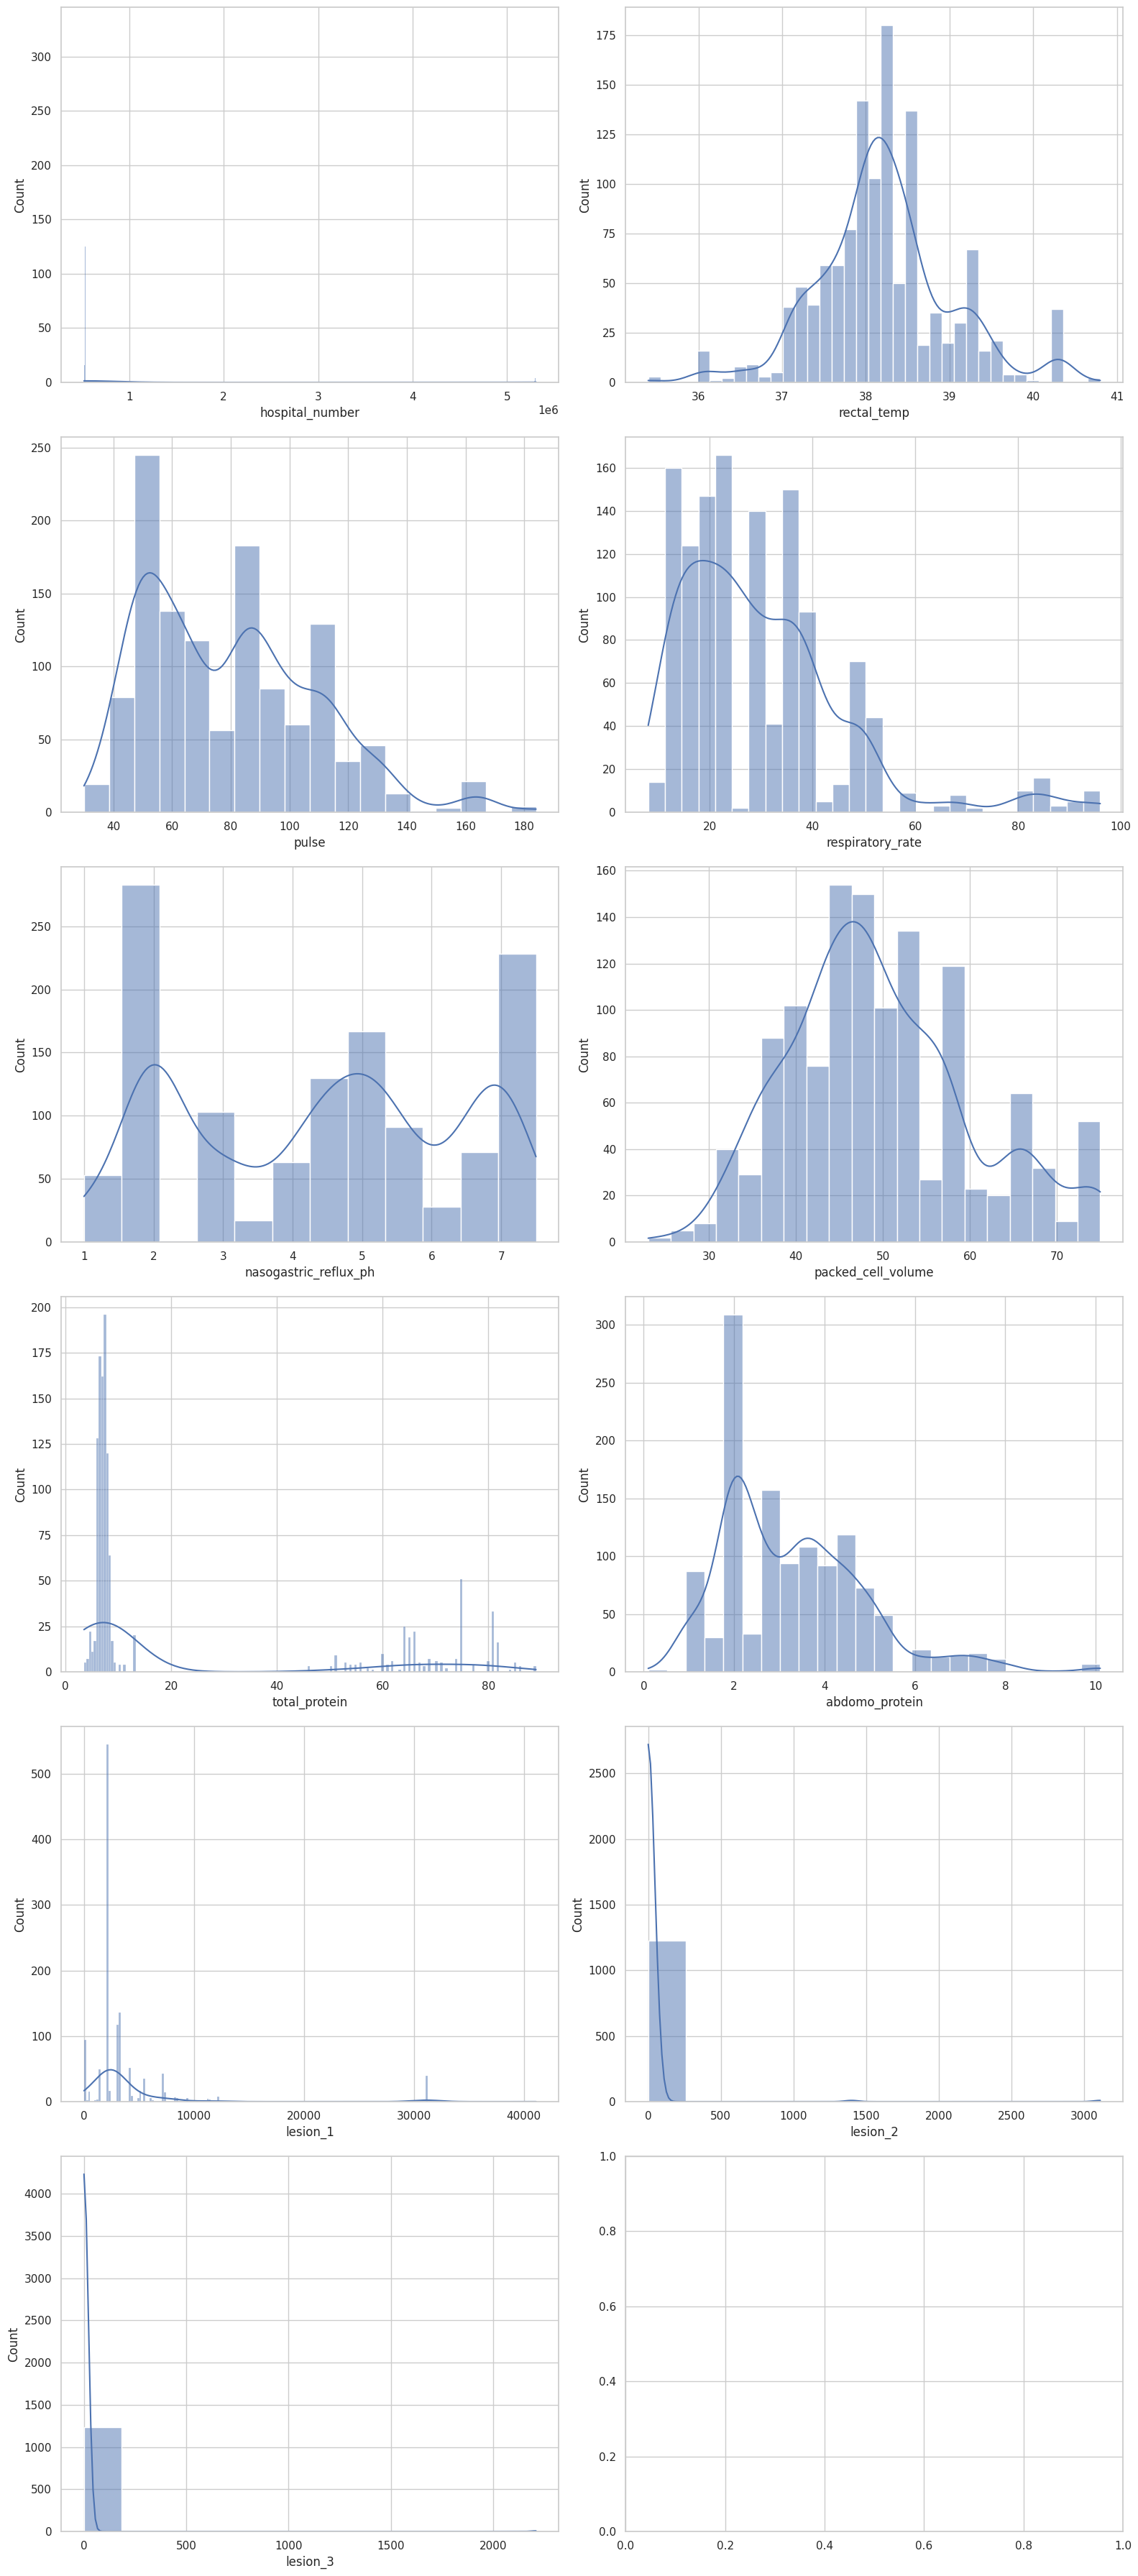

In [30]:
sns.set(style="whitegrid")

rows = (len(numerical_features) + 1) // 2
cols = 2
_, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

for i, feature_name in enumerate(numerical_features):
    row_idx, col_idx = divmod(i, cols)
    sns.histplot(data=train, x=feature_name, kde=True, ax=axes[row_idx, col_idx])

plt.tight_layout()

plt.show()

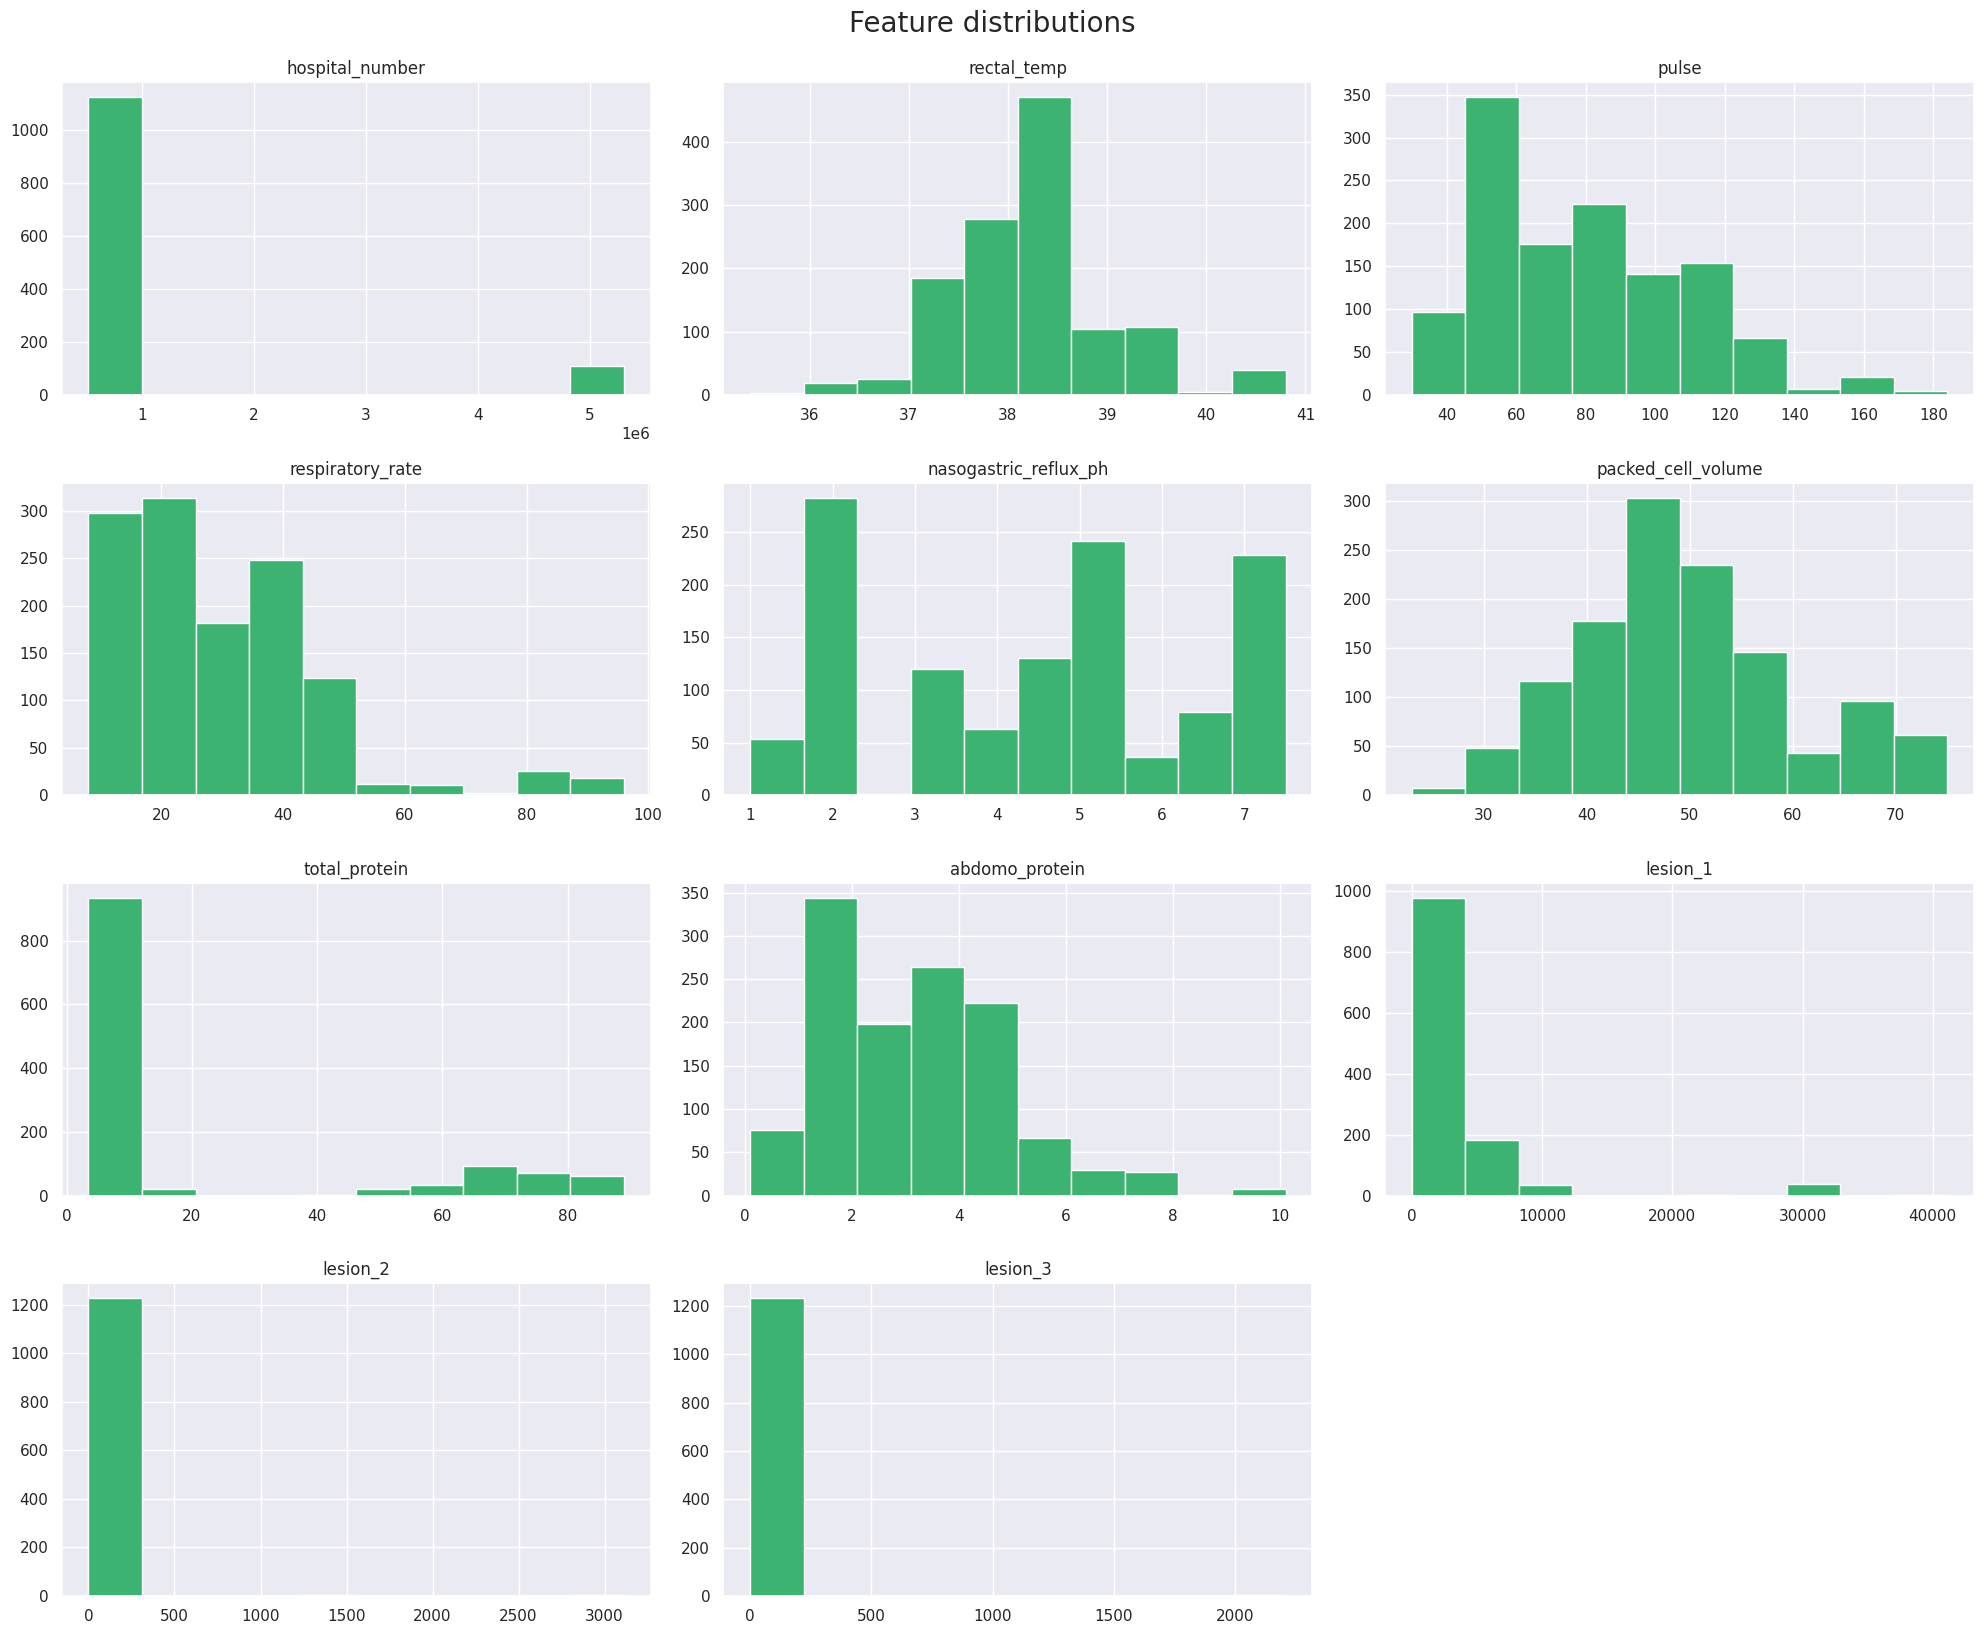

In [31]:
sns.set(rc={'figure.figsize': (20, 16)})
train.hist(color='mediumseagreen')
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=20)
plt.show()

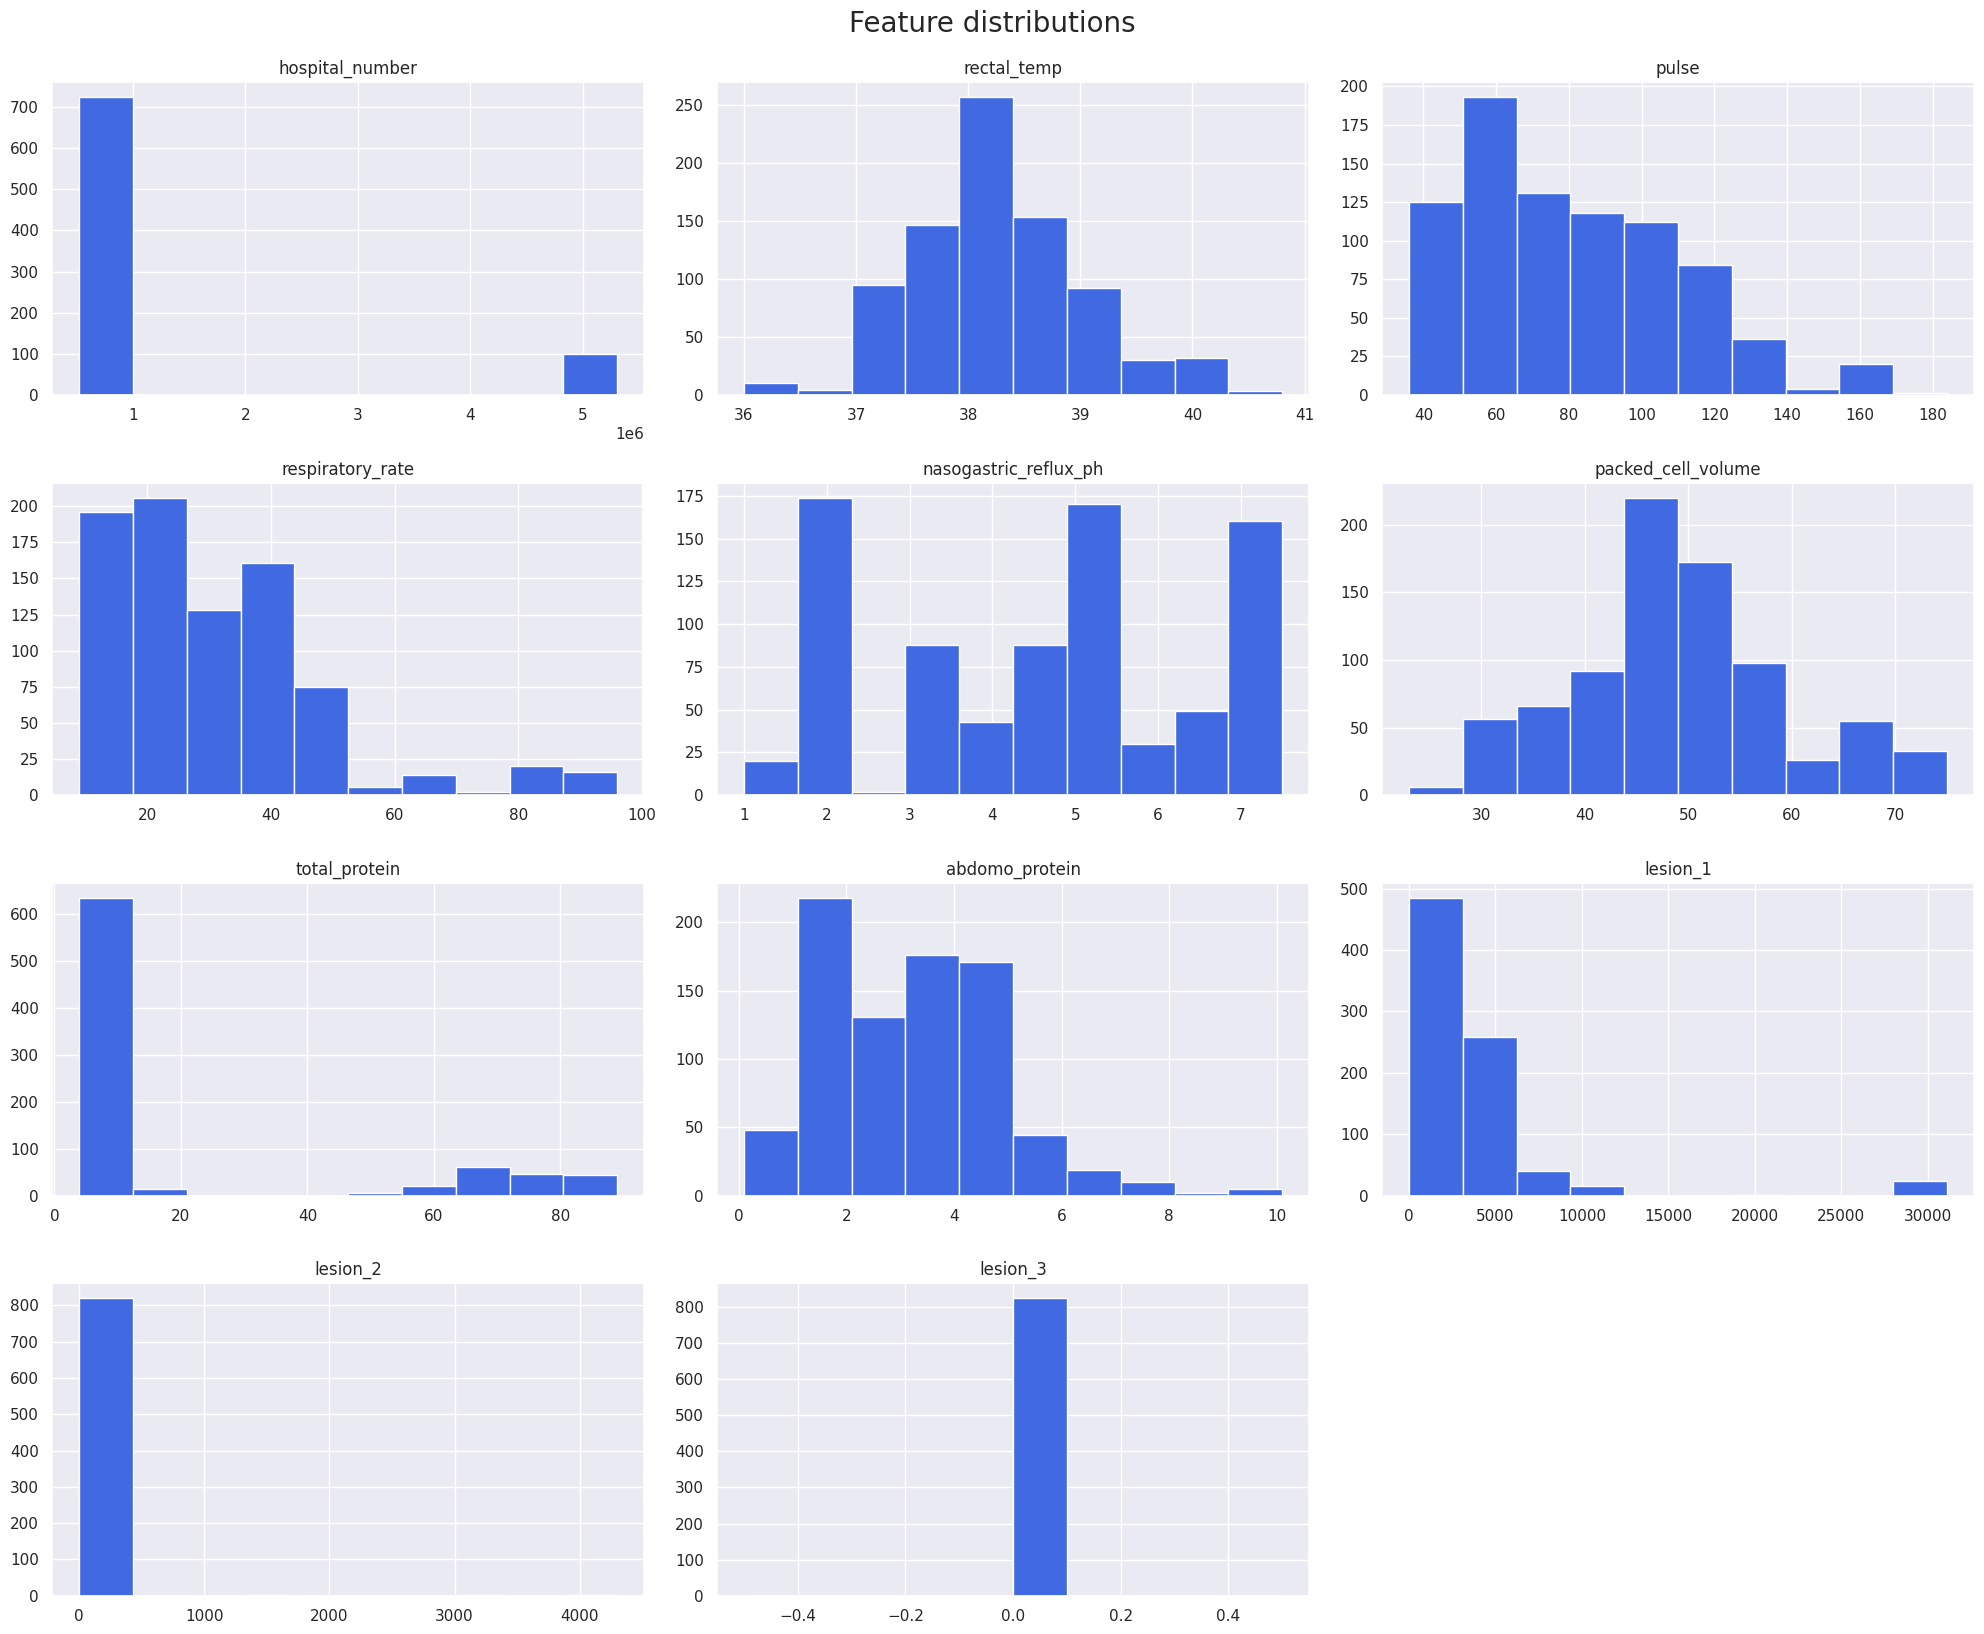

In [32]:
sns.set(rc={'figure.figsize': (20, 16)})
test.hist(color='royalblue')
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=20)
plt.show()

#### データの分布を可視化する

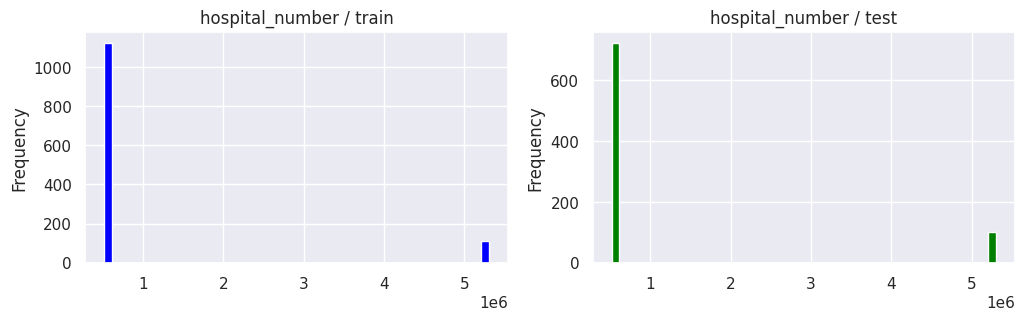

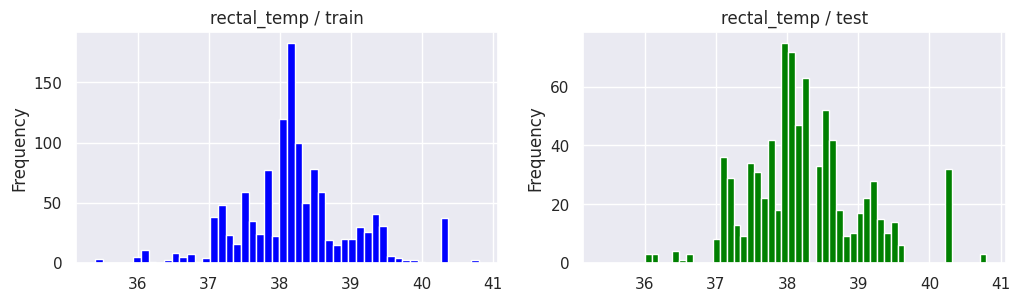

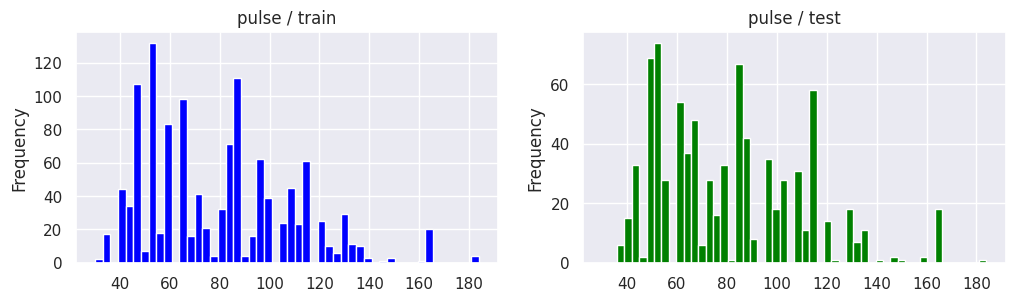

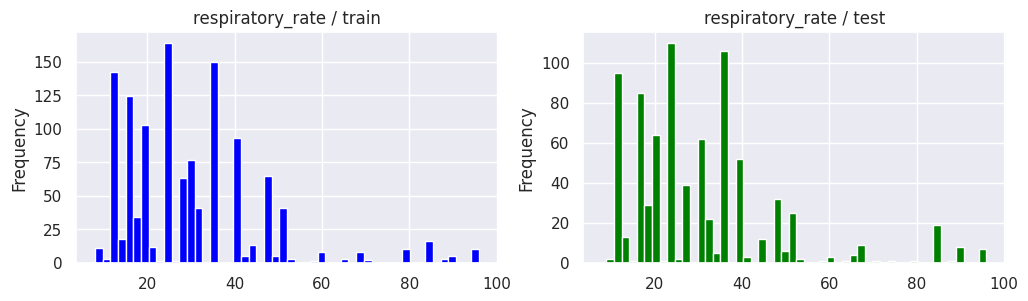

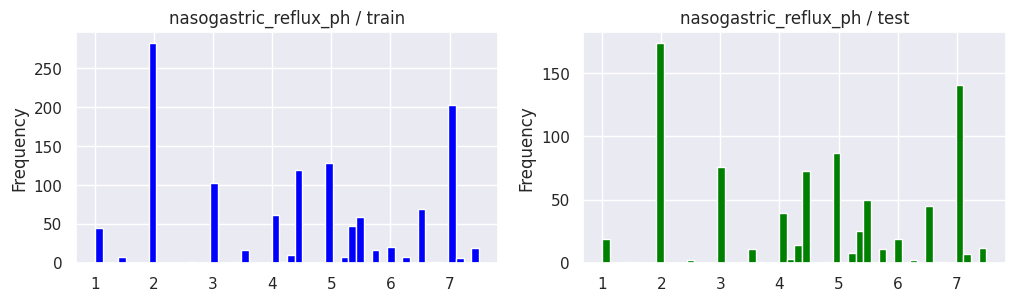

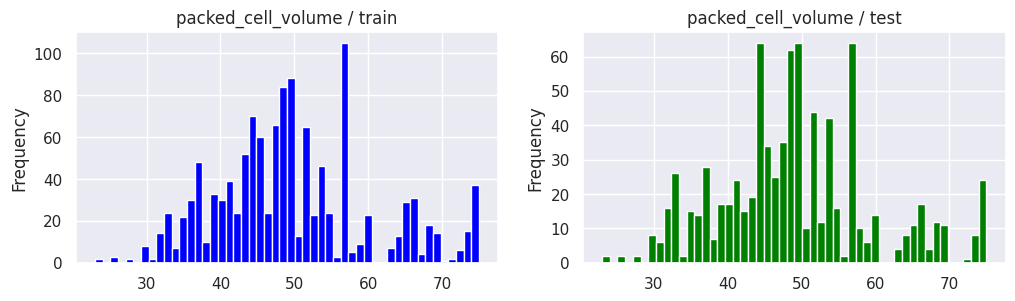

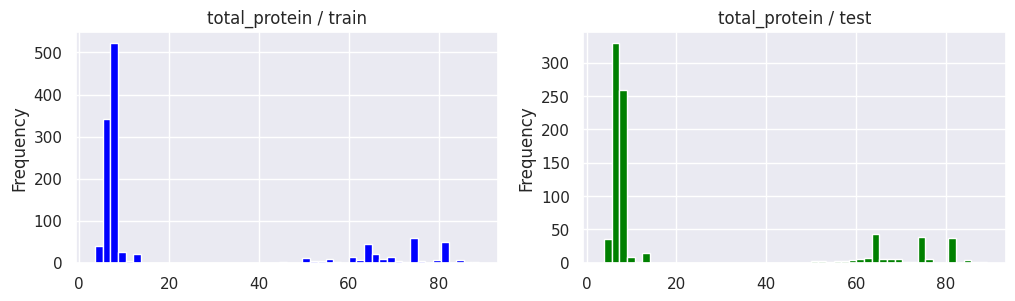

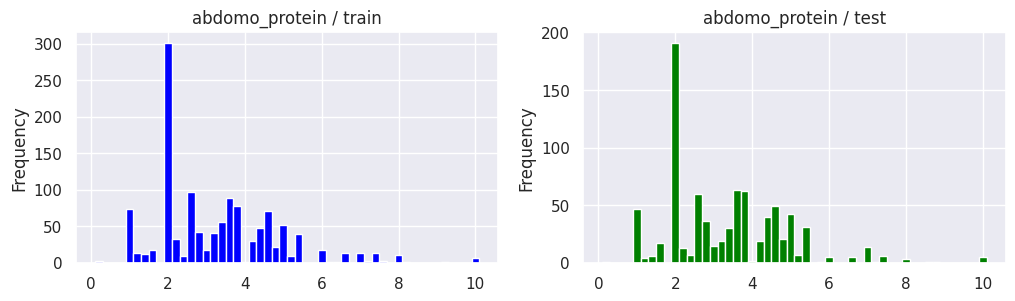

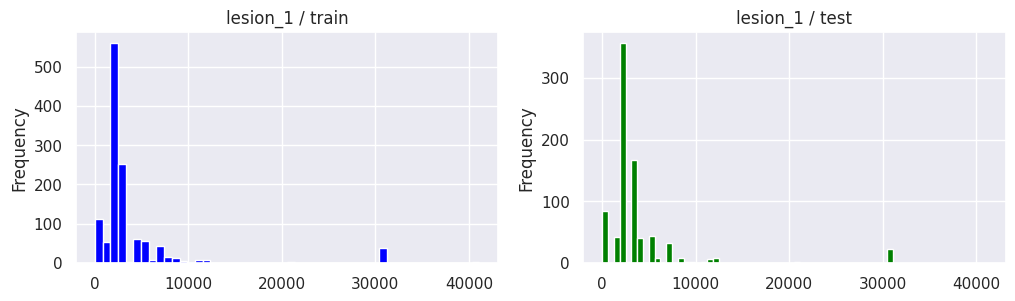

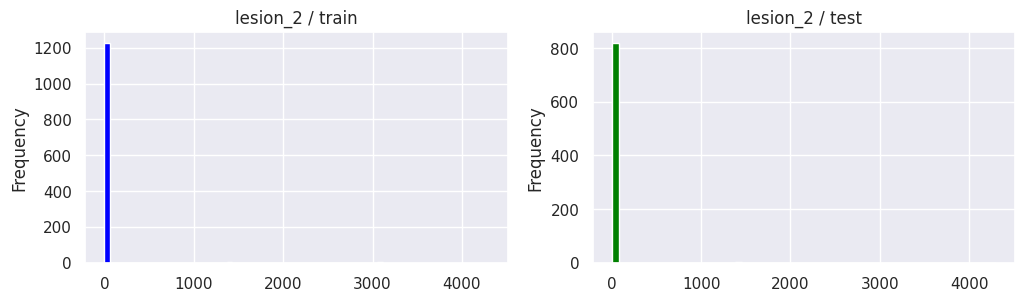

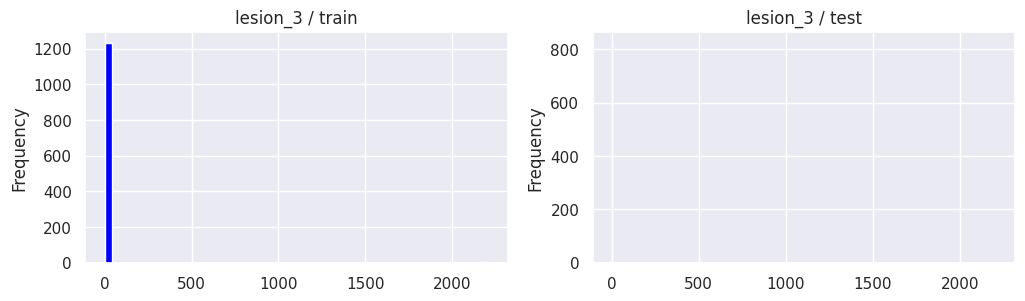

In [33]:
feature = train[numerical_features]

for feat in feature:
    plt.figure(figsize=(12, 3))
    ax1 = plt.subplot(1, 2, 1)
    train[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(feat + ' / train')
    ax2 = plt.subplot(1, 2, 2, sharex=ax1)
    test[feat].plot(kind='hist', bins=50, color='green')
    plt.title(feat + ' / test')

    plt.show()

#### データを対数変換する

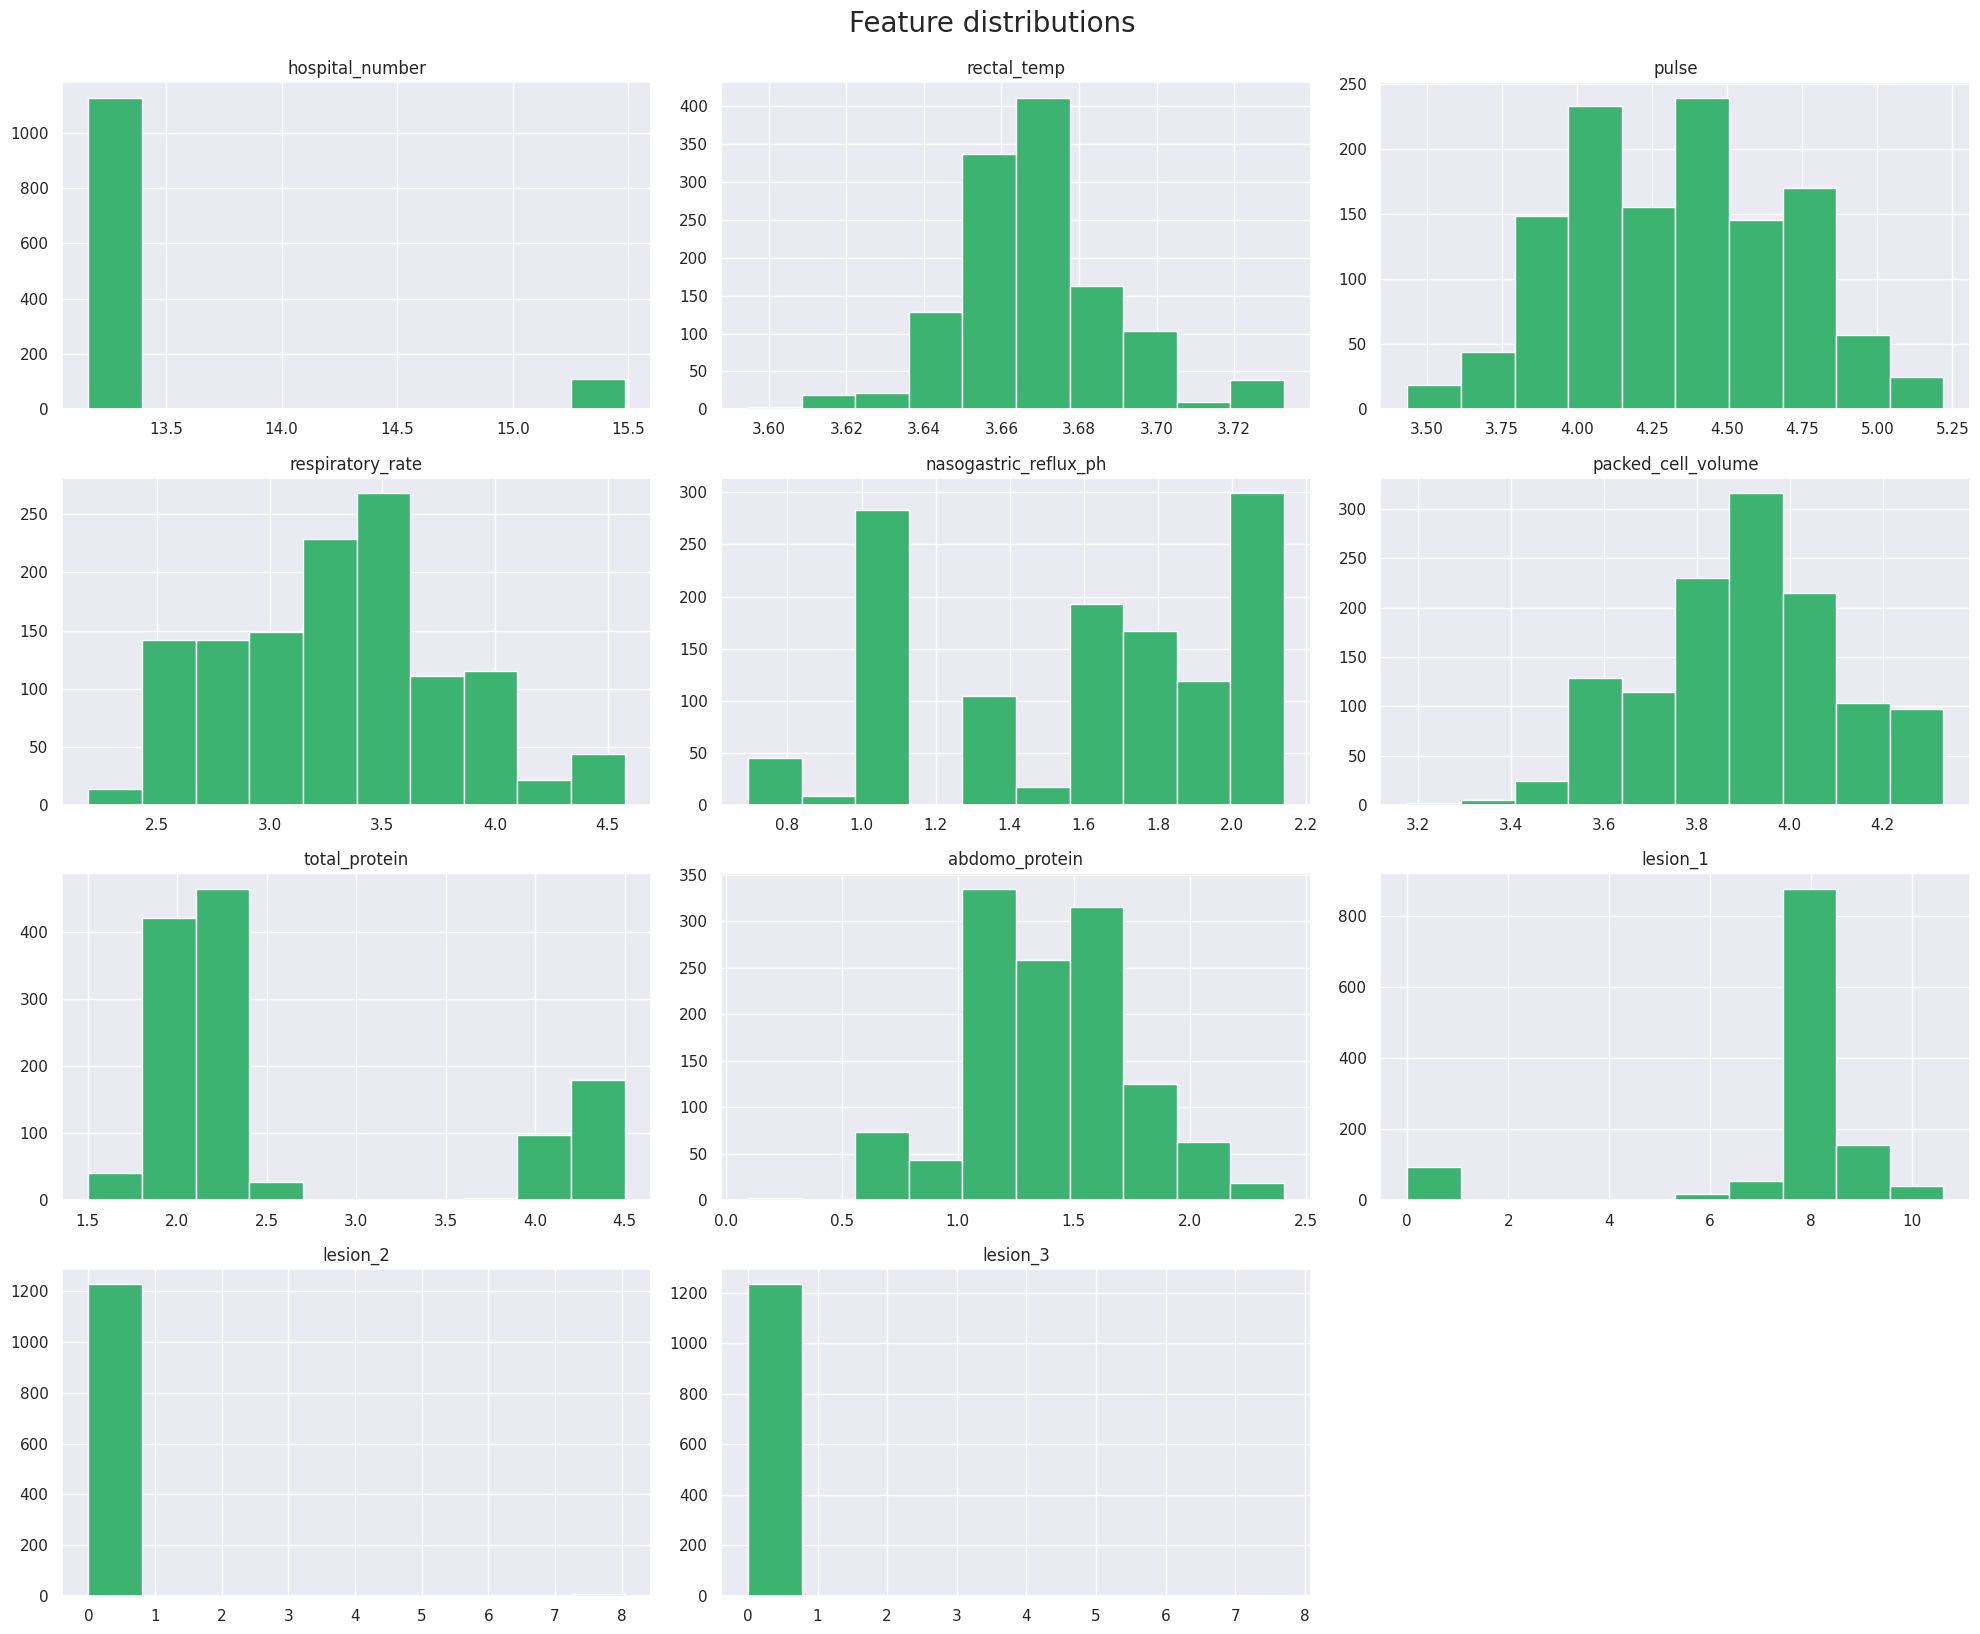

In [34]:
# 訓練データをX(説明変数)とy（目的変数）に分割する
X = train[numerical_features]
y = target

for column in X.columns.tolist():
    X[column] = X[column].apply(lambda x: np.log(x + 1))

X.hist(color='mediumseagreen')
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=20)
plt.show()

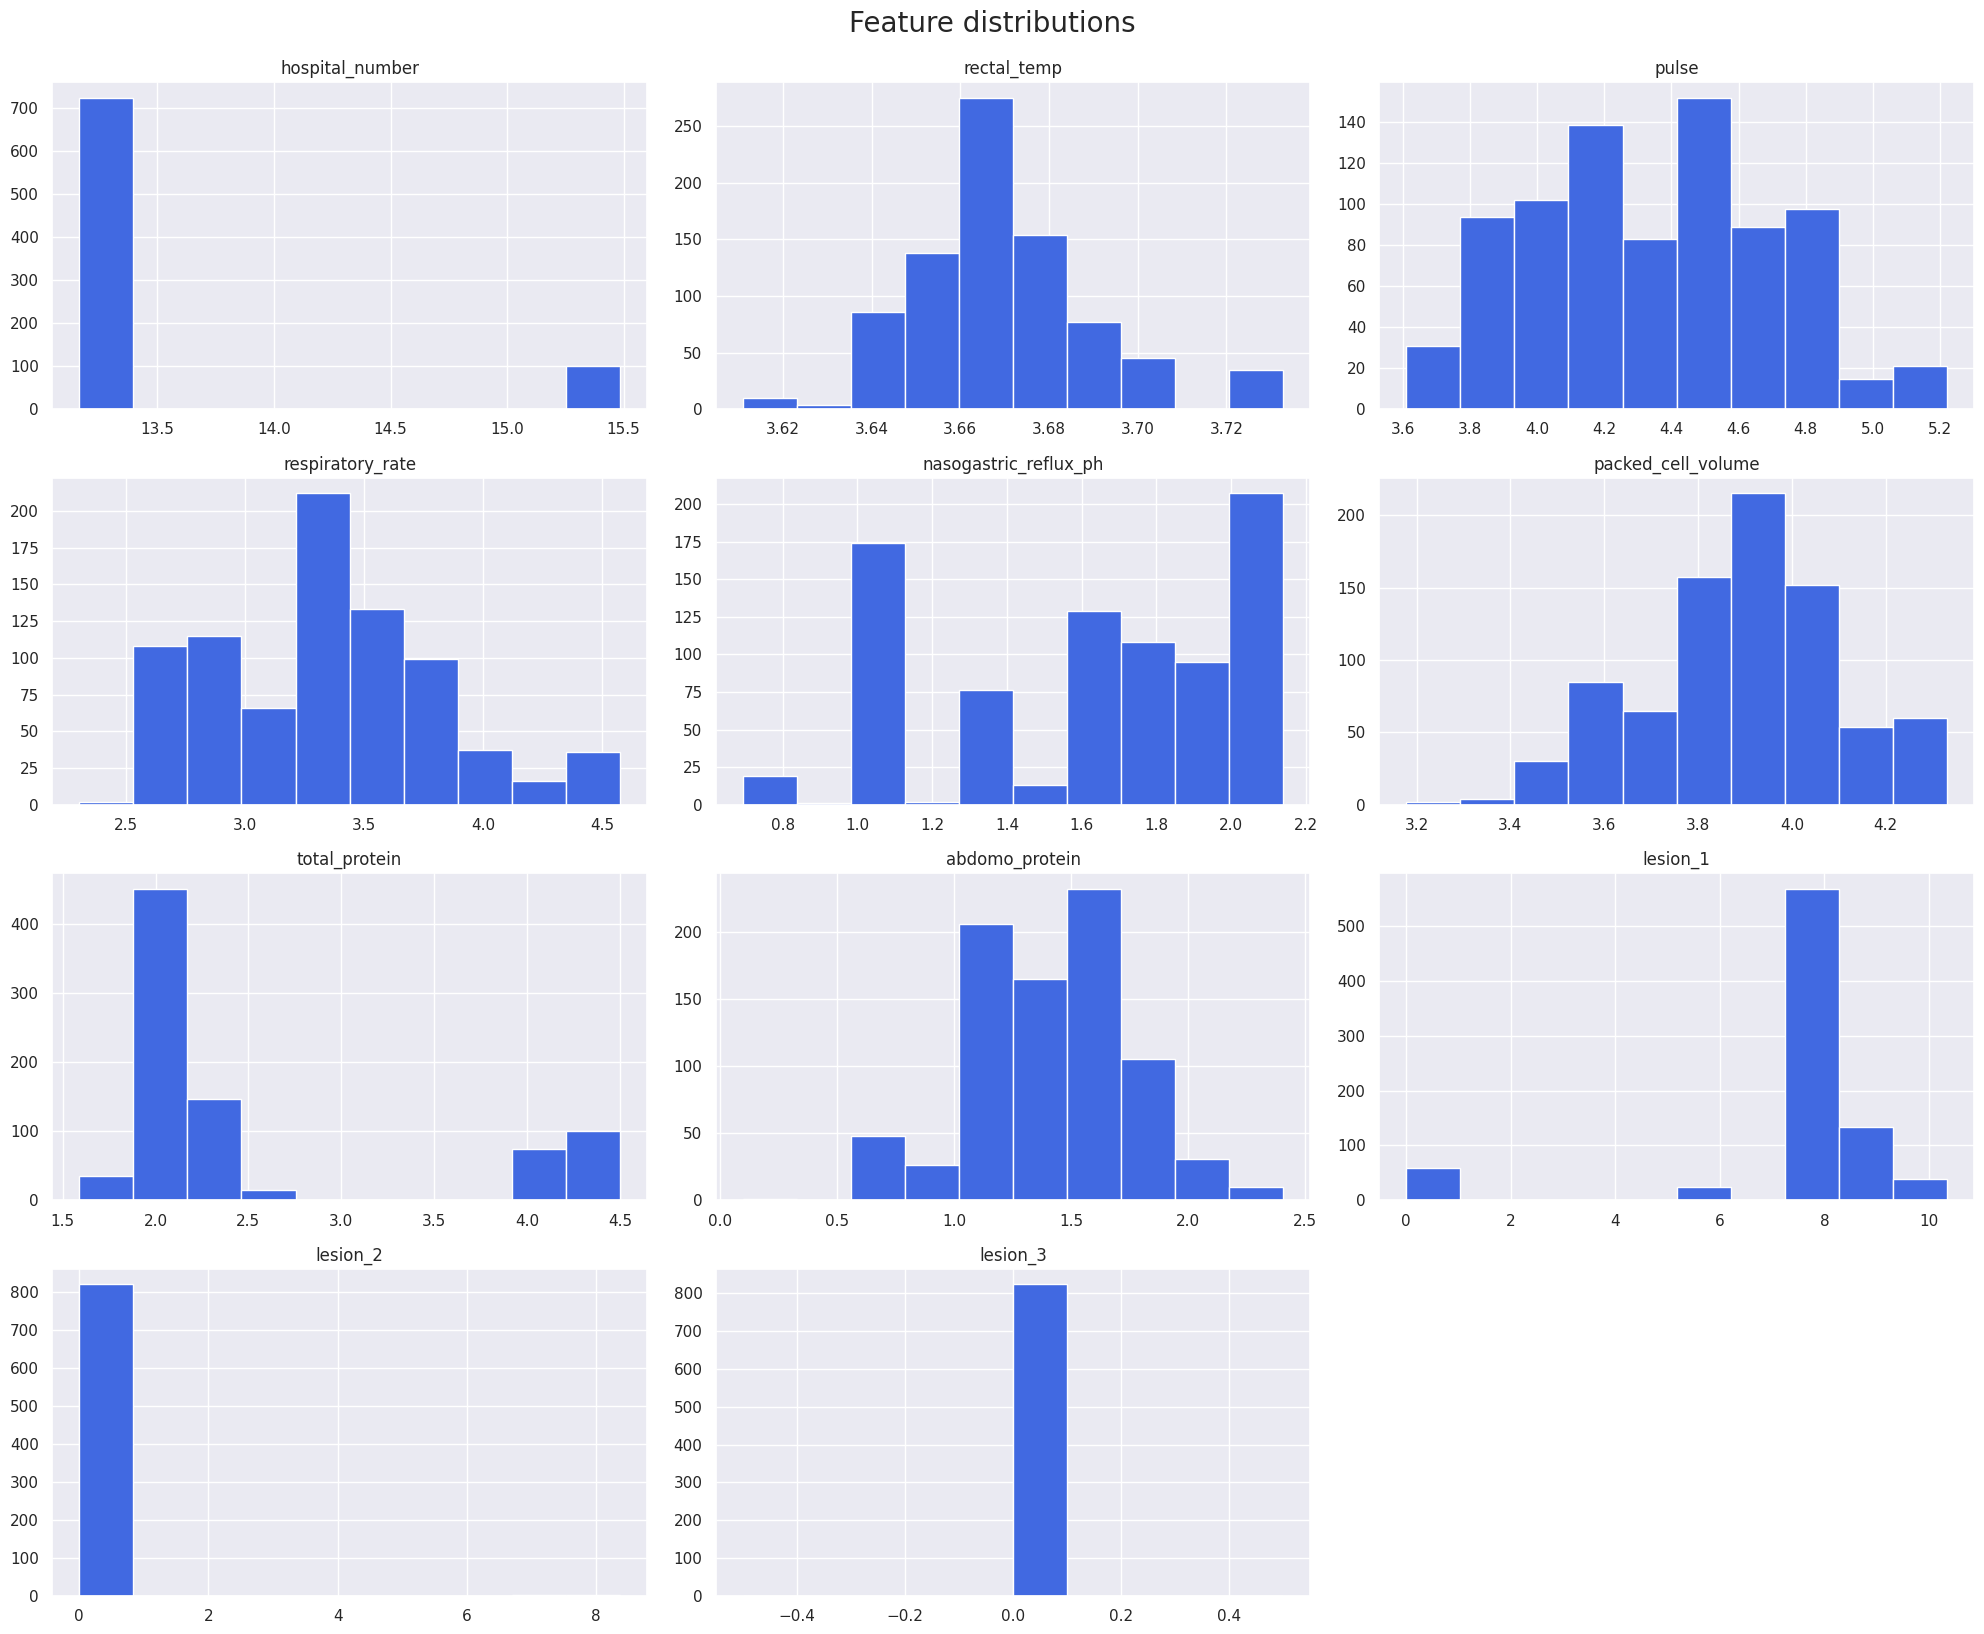

In [35]:
# テストデータも変換する
test_log = test[numerical_features]
for column in test_log.columns.tolist():
    test_log[column] = test_log[column].apply(lambda x: np.log(x + 1))

test_log.hist(color='royalblue')
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=20)
plt.show()

##### 数値型の説明変数の分布

カーネル密度推定（KDE: Kernel Density Estimation）
- 実データから、正規分布曲線のように下部の面積が1となるような連続した曲線（確率密度関数）を推定する

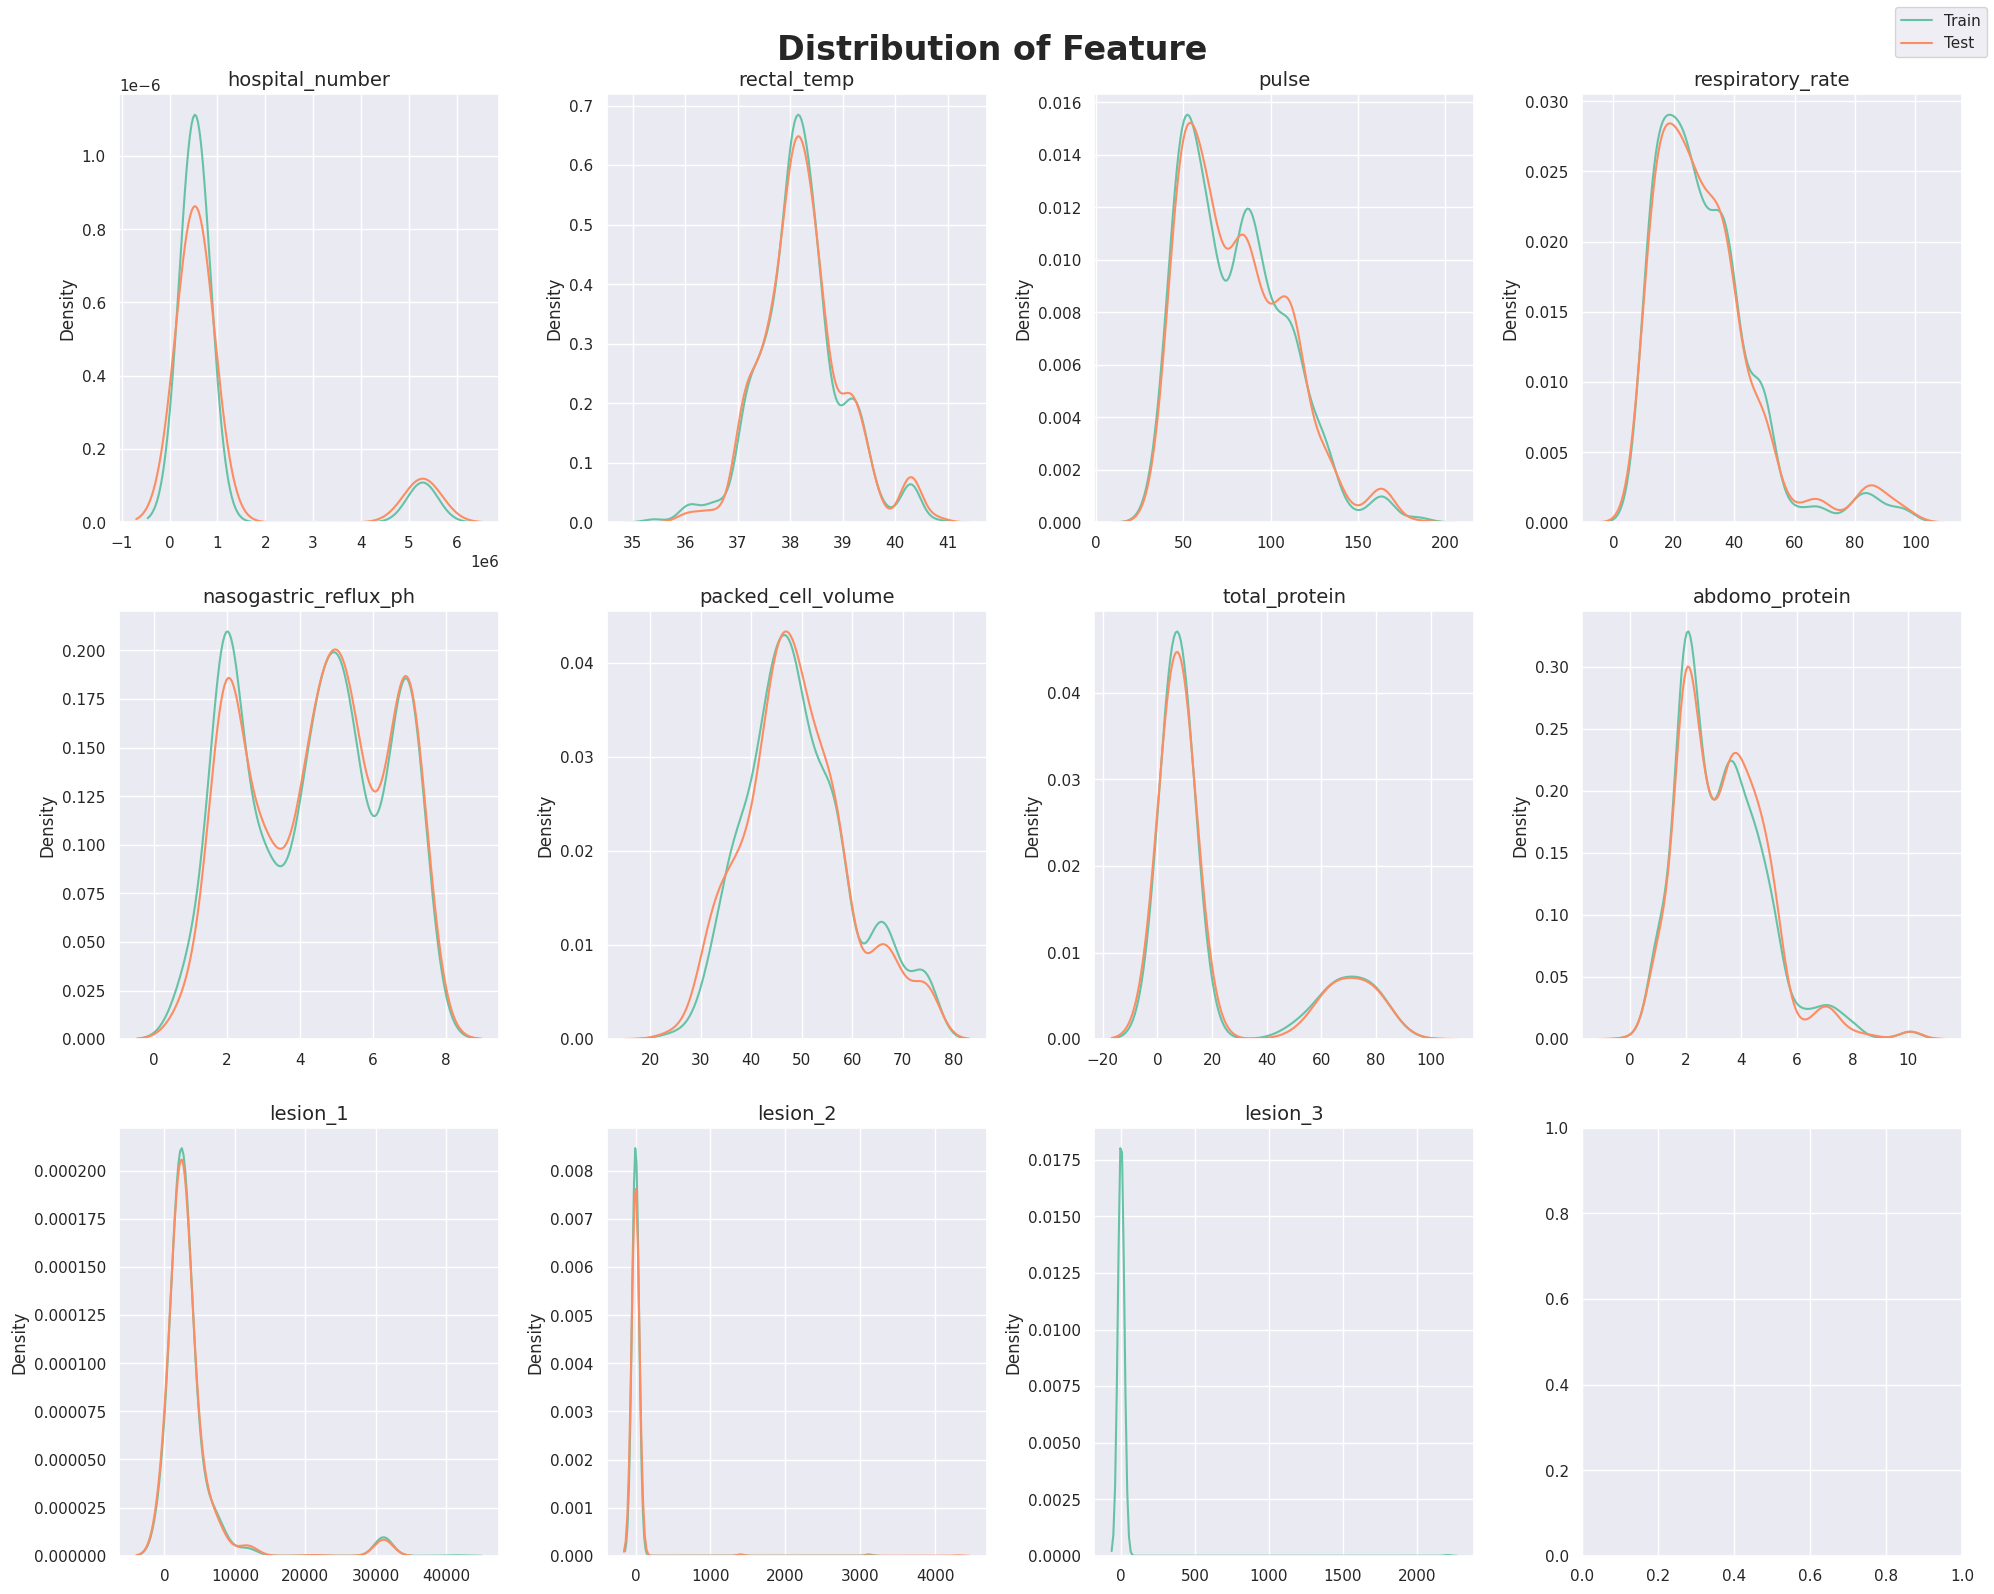

In [36]:
fig, ax = plt.subplots(len(numerical_features) // 4 + 1, 4)
ax = ax.flatten()
pal2 = sns.color_palette("Set2")
for i, column in enumerate(numerical_features):
    sns.kdeplot(train[column], ax=ax[i], color=pal2[0])
    sns.kdeplot(test[column], ax=ax[i], color=pal2[1], warn_singular=False)

    ax[i].set_title(f'{column}', size=14)
    ax[i].set_xlabel(None)

fig.suptitle('Distribution of Feature', fontsize=24, fontweight='bold')
fig.legend(['Train', 'Test'])
plt.tight_layout()

#### Adversarial Validation(敵対性の検証)

- Adversarial Validation(敵対性の検証)の目的
    - 訓練用のデータセットとテスト用データセットの間で値の分布に差があるかないかを検証すること
- もしもしこの検証の結果得られるROC-AUCスコアが0.5に近いようなら、二つのデータセットは同じ分布を持っていると考えていい
    - しかしその値が0.5から離れているようなら、分布が同様とは言えない

- 信頼できるCV（Cross-validation）スコアは同様の分布を持つデータセットからのみ取得されるため、あらかじめCVスコアが信頼できることを確認しておくためこの検証が必要

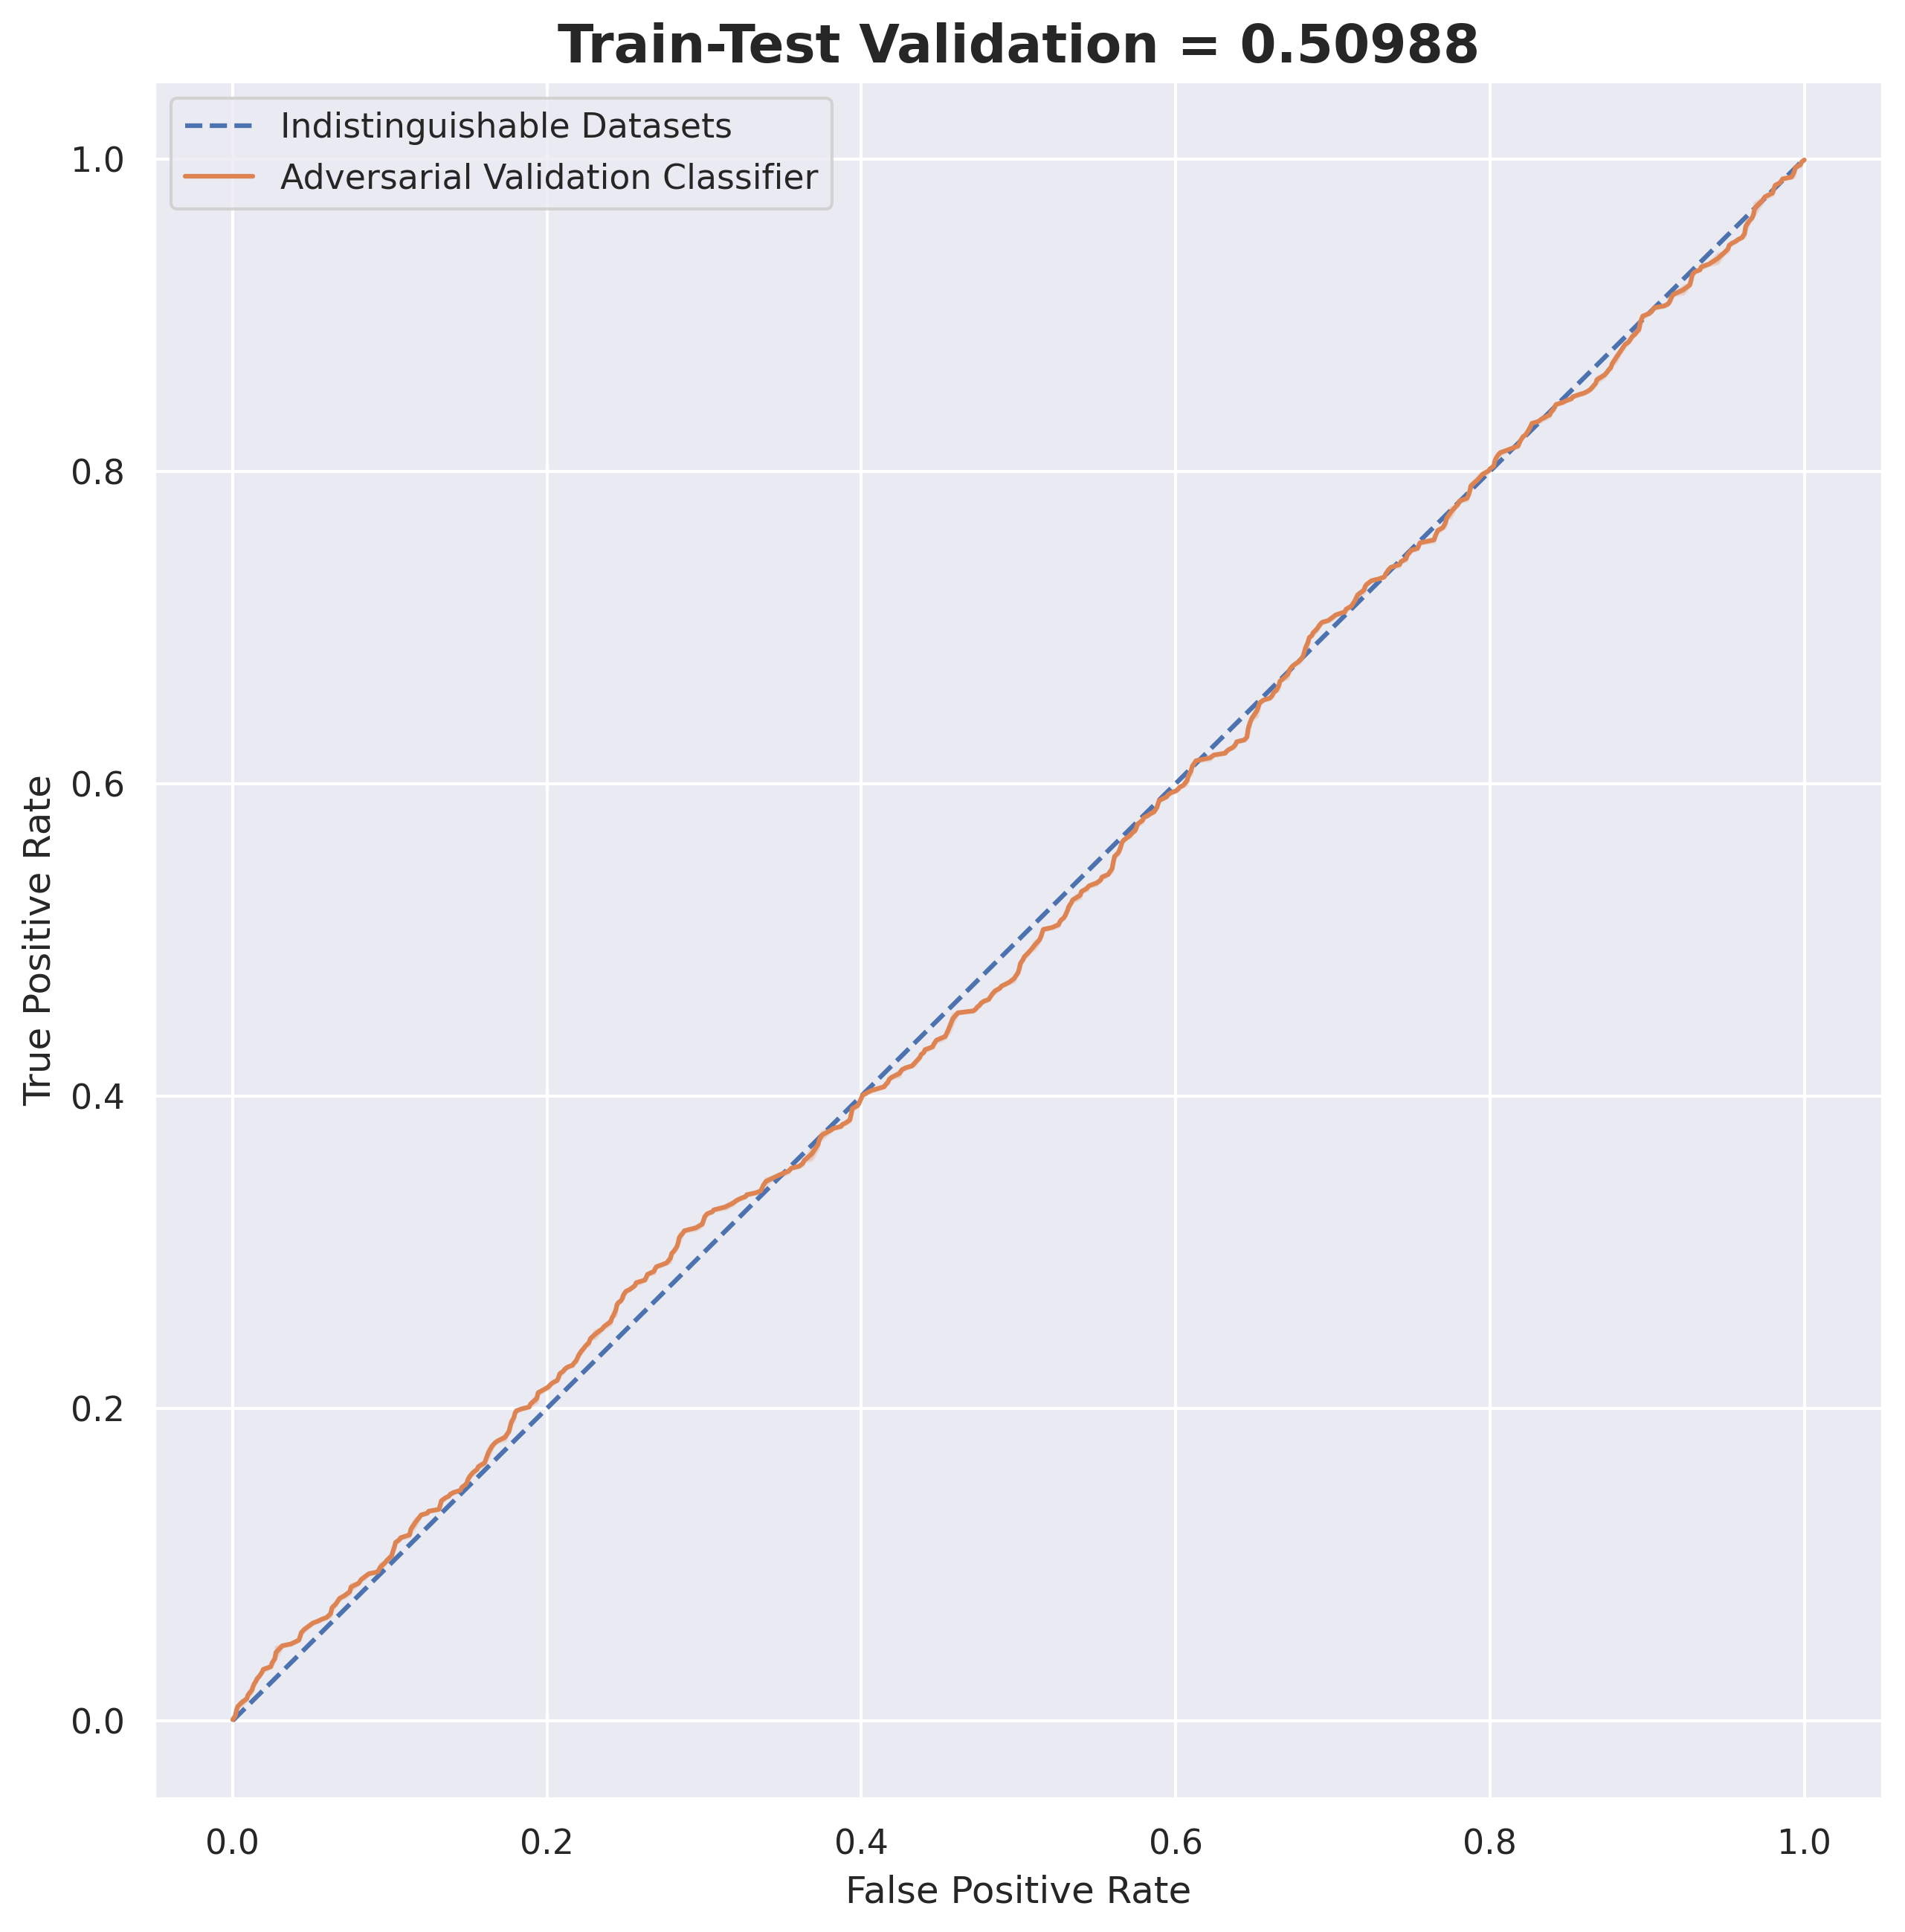

In [37]:
# 時間がかかるため、割愛
def adversarial_validation(dataset_1=train, dataset_2 = test, label='Train-Test'):
    adv_train = dataset_1.drop(target_col, axis=1)
    adv_test = dataset_2.copy()

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1

    adv = pd.concat([adv_train, adv_test], ignore_index=True)
    adv_shuffled = adv.sample(frac=1)
    adv_X = adv_shuffled.drop('is_test', axis=1)
    adv_y = adv_shuffled.is_test

    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = make_pipeline(OneHotEncoder(cols=categorical_features), XGBClassifier(random_state=42))
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:, 1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize=(10, 10), dpi=300)
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'{label} Validation = {np.mean(val_scores):.5f}', weight='bold', size=17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

adversarial_validation()

## 円グラフと棒グラフ

##### カテゴリ型変数の分布

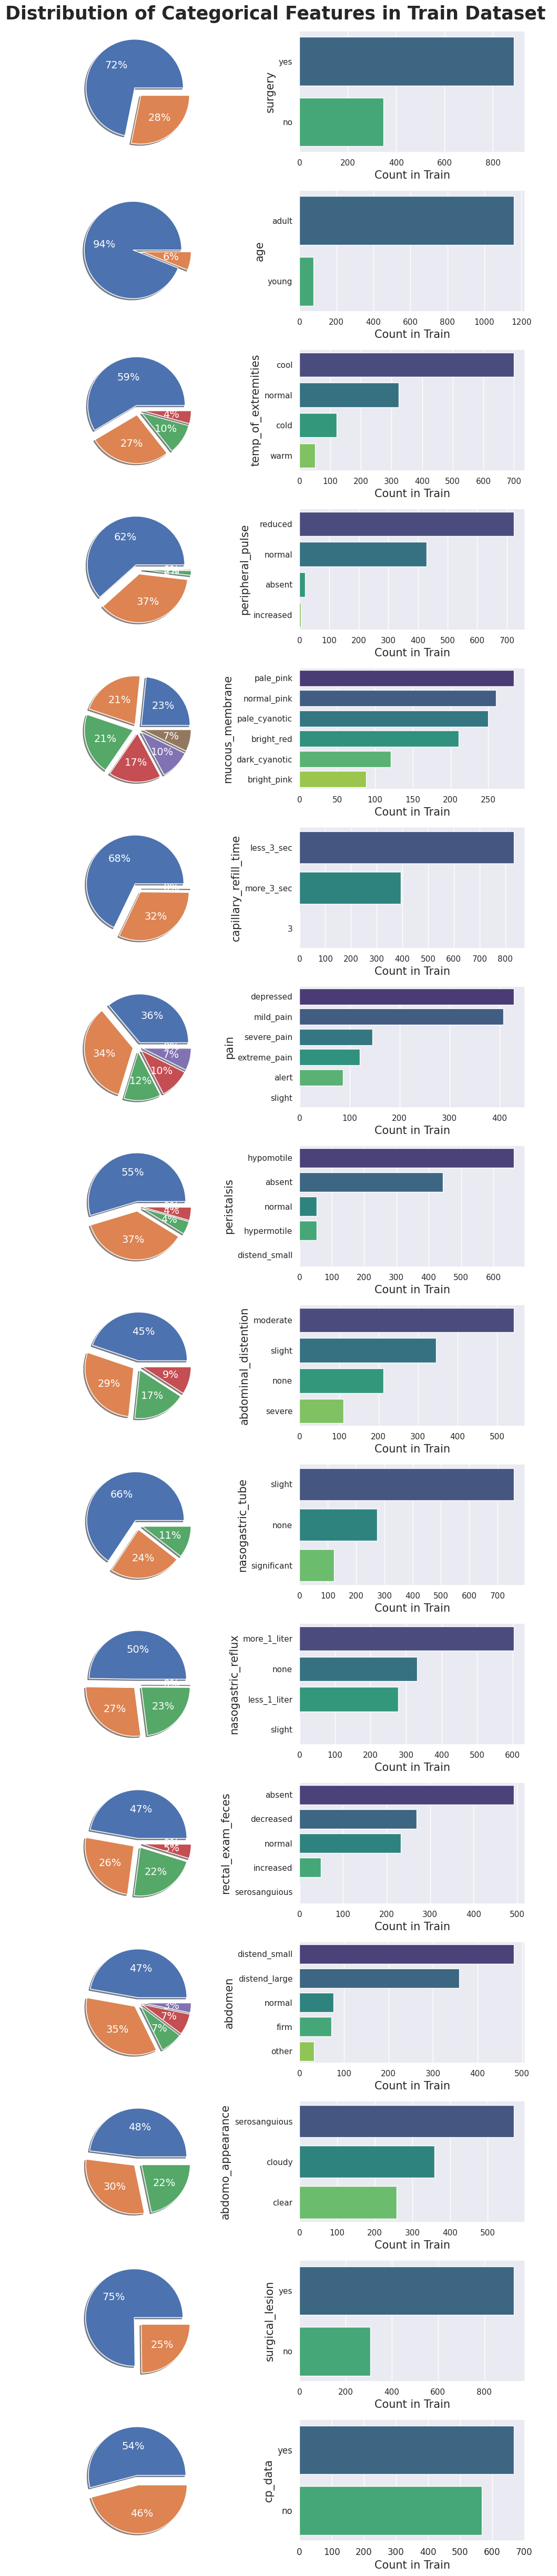

In [42]:
fig, ax = plt.subplots(len(categorical_features), 2, figsize=(10, 50))

for i, column in enumerate(categorical_features):
    ax[i][0].pie(
        train[column].value_counts(),
        shadow=True,
        explode=[.1 for i in range(train[column].nunique())],
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'}
    )

    sns.countplot(data=train, y=column, ax=ax[i][1], palette='viridis', order=train[column].value_counts().index)
    ax[i][1].yaxis.label.set_size(20)
    plt.yticks(fontsize=12)
    ax[i][1].set_xlabel('Count in Train', fontsize=15)
    ax[i][1].set_ylabel(f'{column}', fontsize=15)
    plt.xticks(fontsize=12)

fig.suptitle('Distribution of Categorical Features in Train Dataset \n\n', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

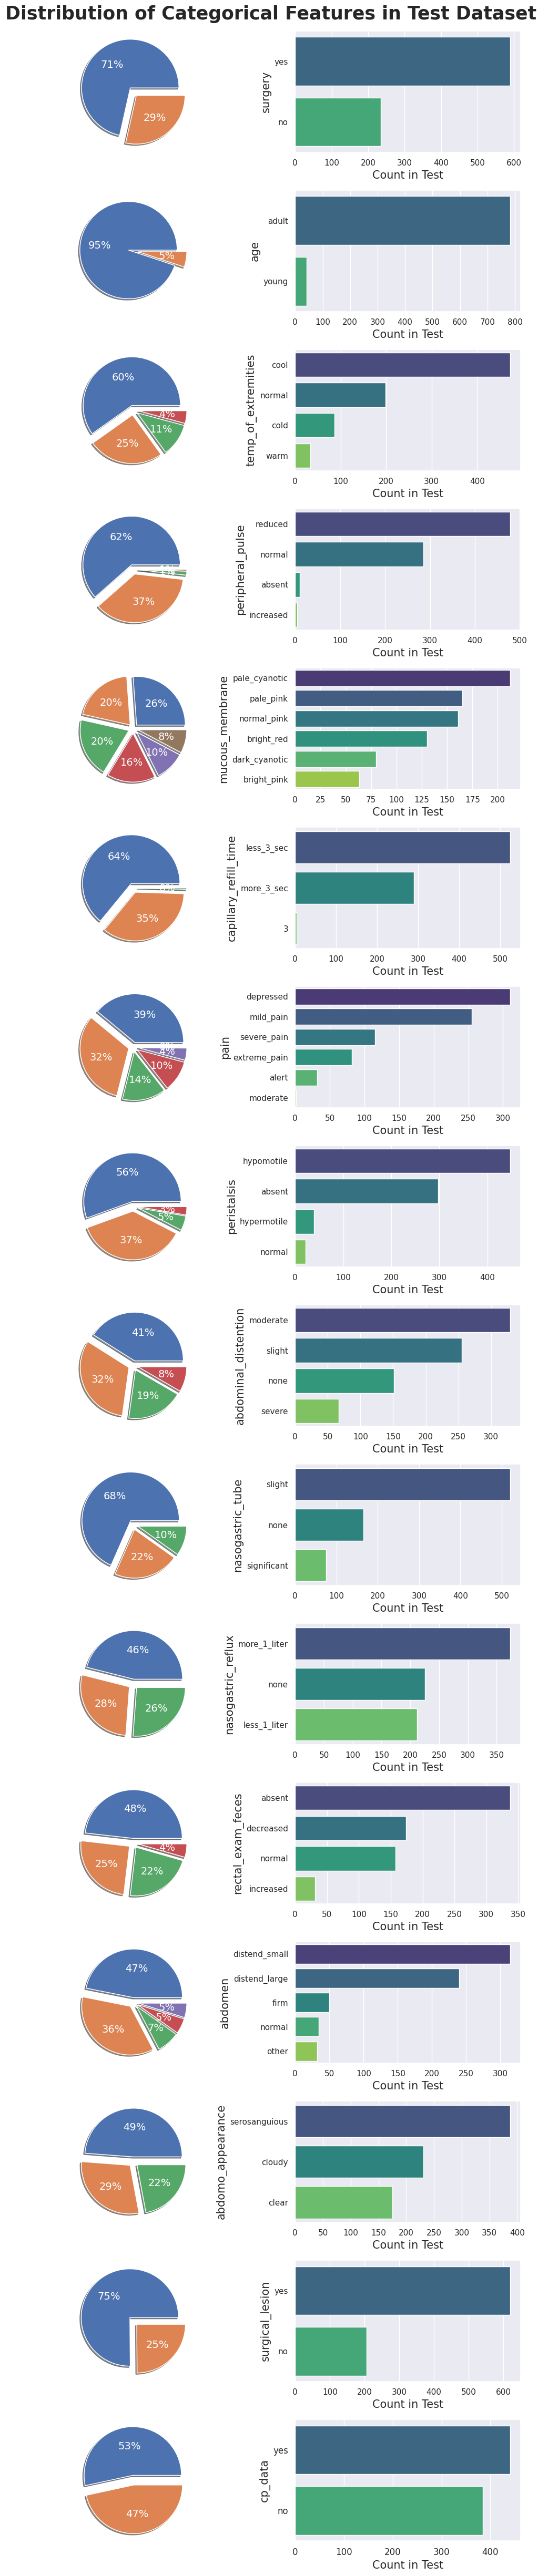

In [43]:
fig, ax = plt.subplots(len(categorical_features), 2, figsize=(10, 50))

for i, column in enumerate(categorical_features):
    ax[i][0].pie(
        test[column].value_counts(),
        shadow=True,
        explode=[.1 for i in range(test[column].nunique())],
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'}
    )

    sns.countplot(data=test, y=column, ax=ax[i][1], palette='viridis', order=test[column].value_counts().index)
    ax[i][1].yaxis.label.set_size(20)
    plt.yticks(fontsize=12)
    ax[i][1].set_xlabel('Count in Test', fontsize=15)
    ax[i][1].set_ylabel(f'{column}', fontsize=15)
    plt.xticks(fontsize=12)

fig.suptitle('Distribution of Categorical Features in Test Dataset \n\n', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

### 円グラフと棒グラフ（目的変数）

outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64


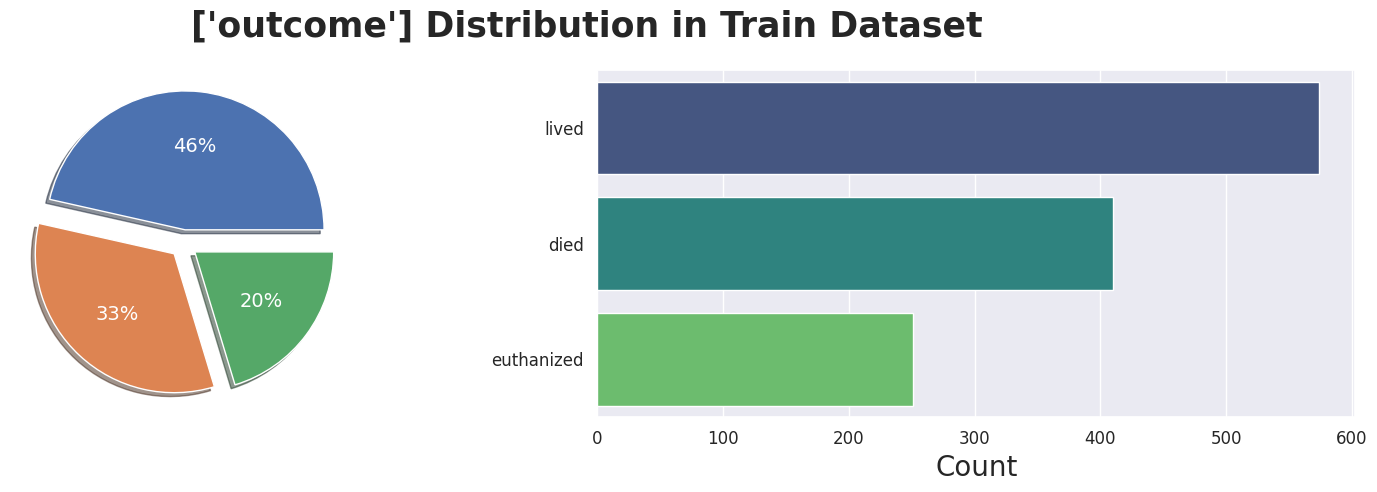

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

ax[0].pie(
    target.value_counts(),
    shadow=True,
    explode=[.1 for i in range(target.nunique())],
    autopct='%1.f%%',
    textprops={'size': 14, 'color':'white'}
)

sns.countplot(data=train, y=target_col, ax=ax[1], palette='viridis', order=train[target_col].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize=12)
ax[1].set_xlabel('Count', fontsize=20)
ax[1].set_ylabel(None)
plt.xticks(fontsize=12)

fig.suptitle(target_name + ' Distribution in Train Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()

# 目的変数を数える
print(f'{train[target_col].value_counts()}')

##### 目的変数のカテゴリ変数の分布

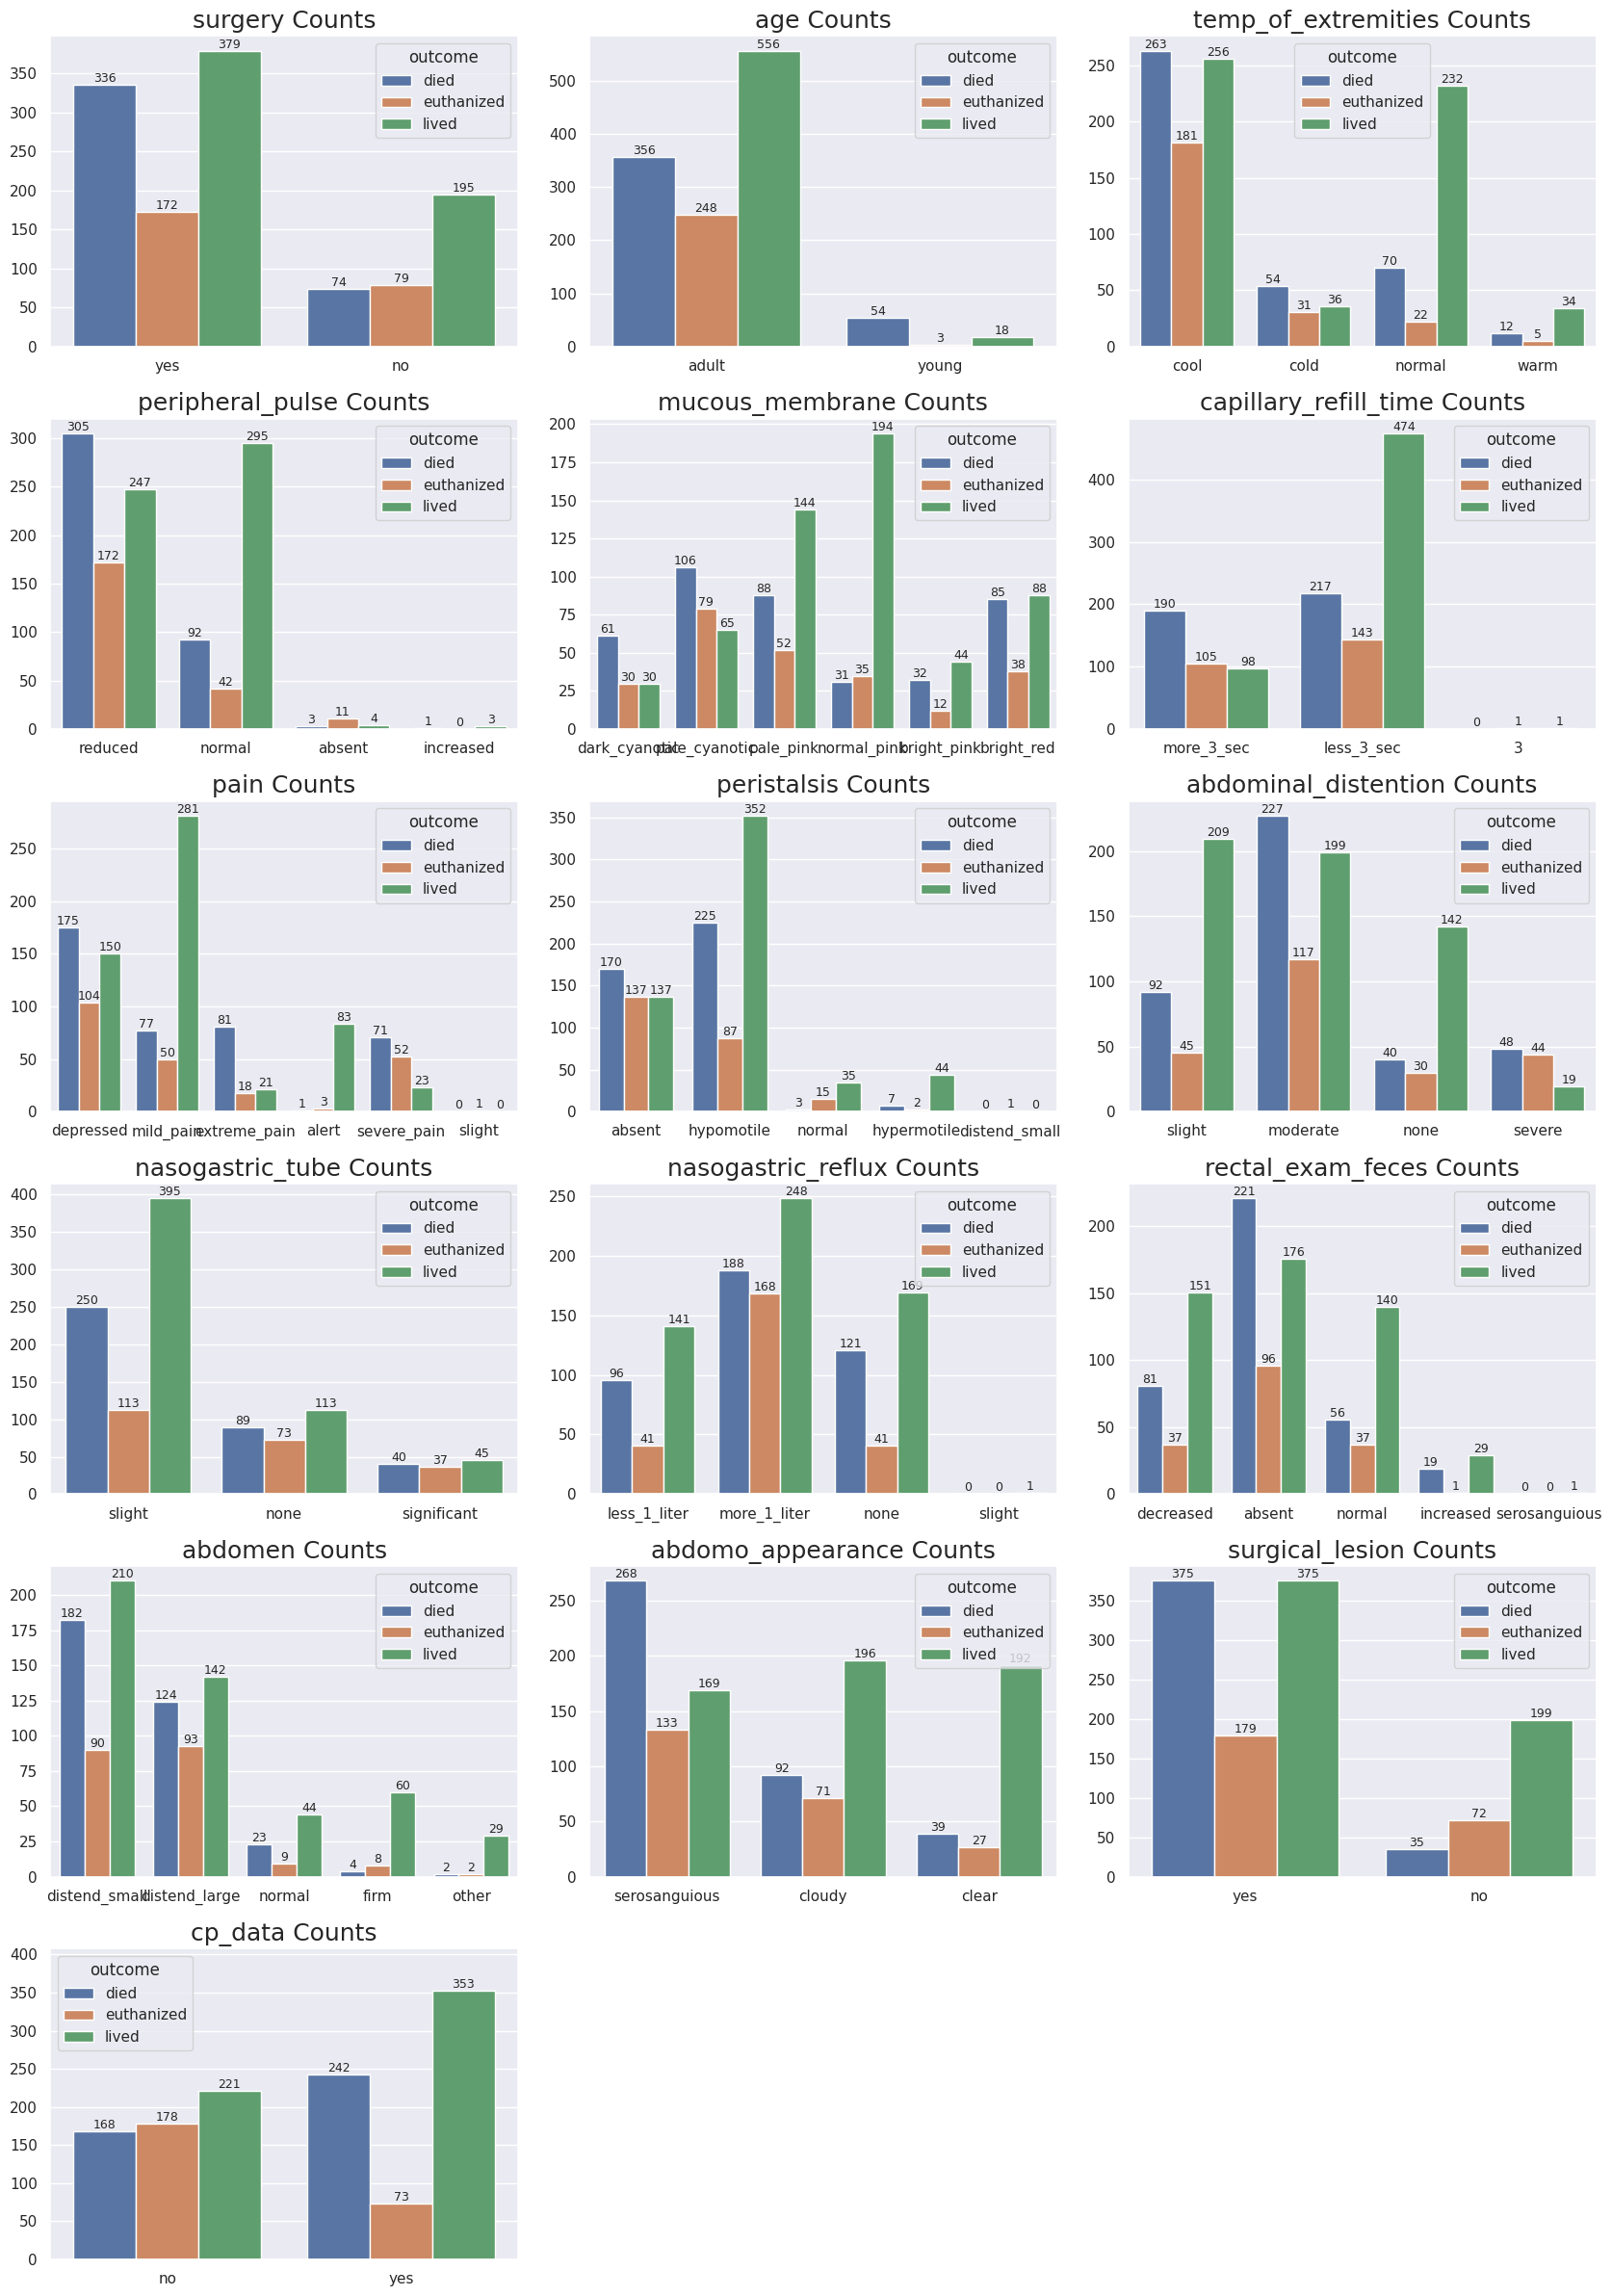

In [44]:
def plot_count(df, columns, n_cols, hue):
    n_rows = (len(columns)-1) // n_cols + 1
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
    ax = ax.flatten()

    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, ax=ax[i], hue=hue)

        ax[i].set_title(f'{column} Counts', fontsize=18)
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)
        ax[i].tick_params(axis='x')

        for p in ax[i].patches:
            value = int(p.get_height())
            ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)
    for i in range(len(columns), len(ax)):
        ax[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_count(train, categorical_features, 3, 'outcome')

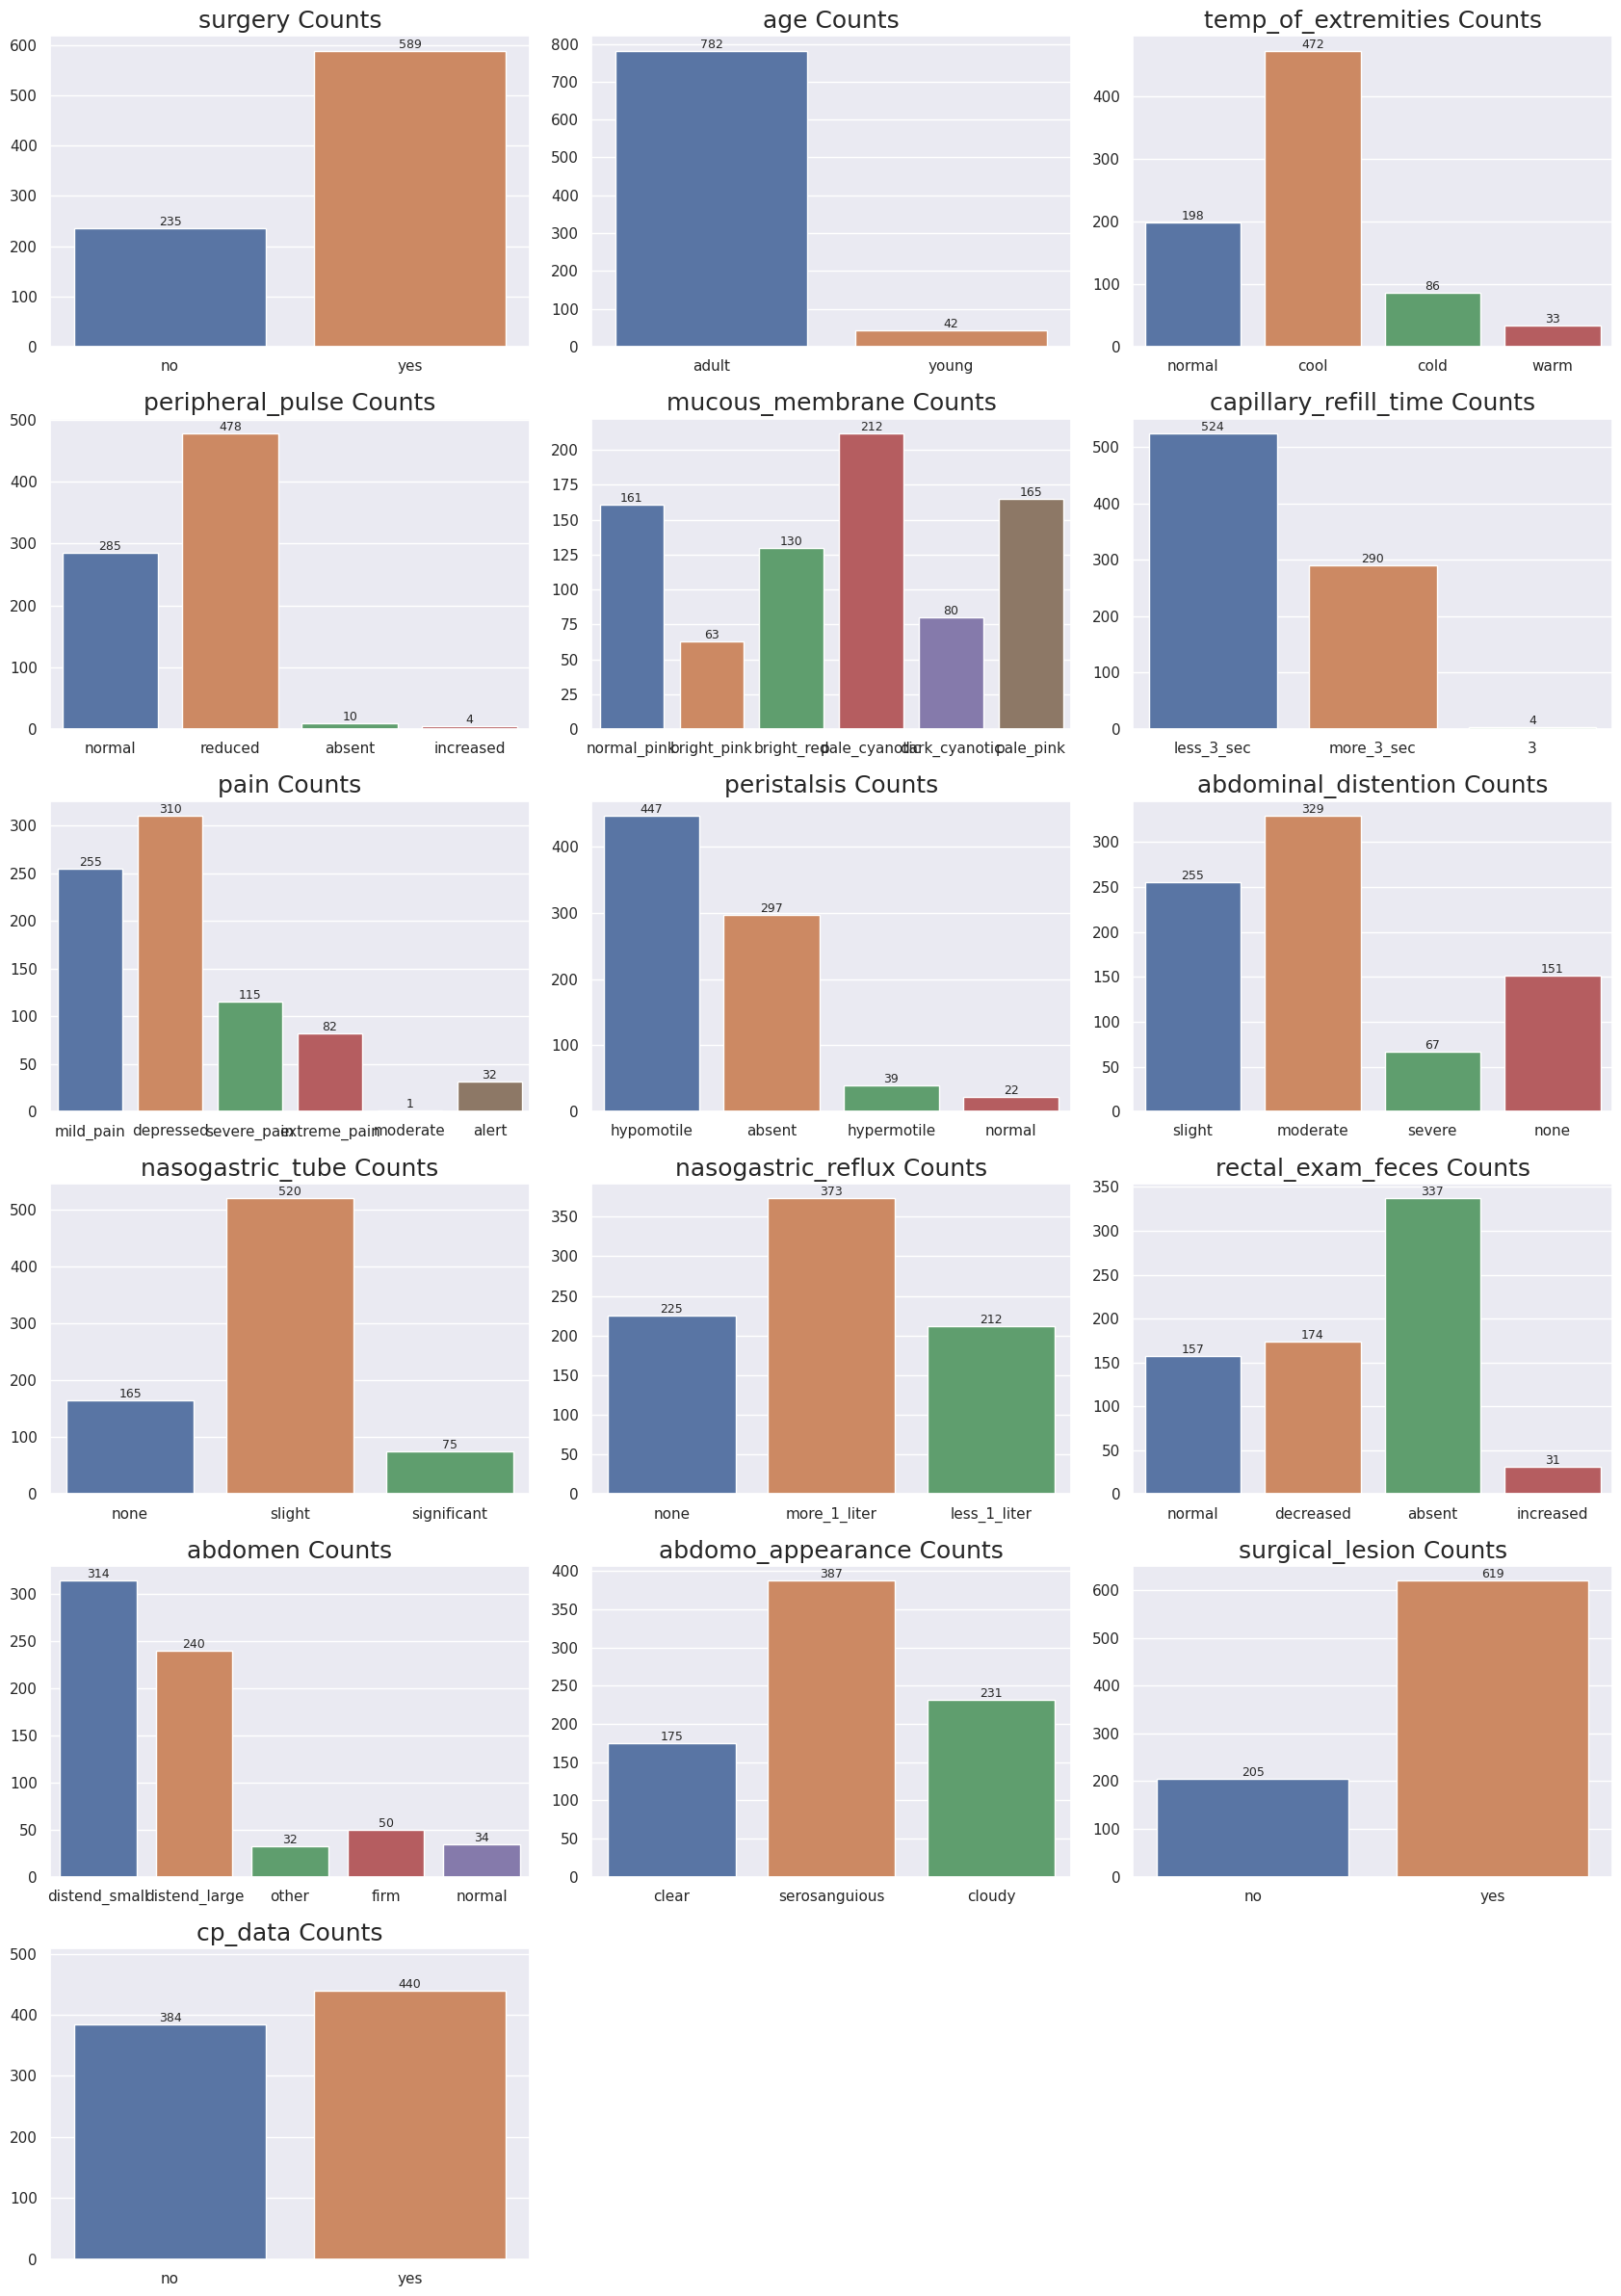

In [45]:
plot_count(test, categorical_features, 3, None)

考察
- 基本的にカテゴリ変数は特徴量エンジニアリングで変換可能な水準数である
- One-Hot Encodingであっても、特徴量が過剰に多くなることも避けられると考察した

### 箱ひげ図

数値型の説明変数

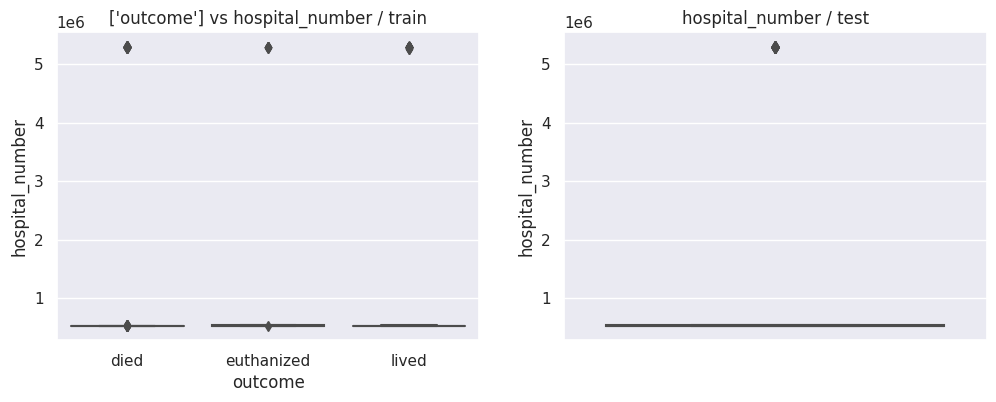

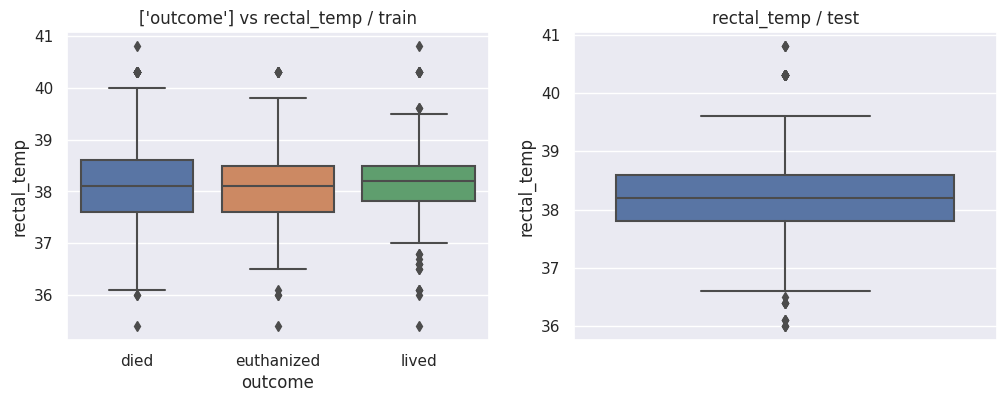

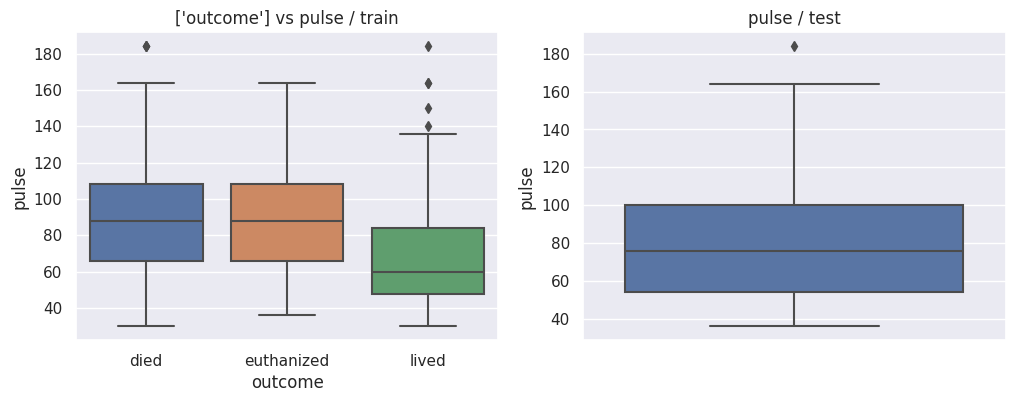

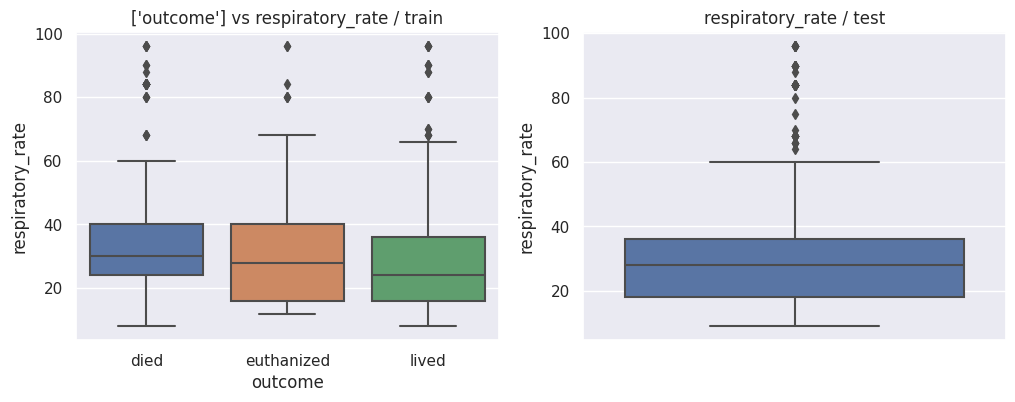

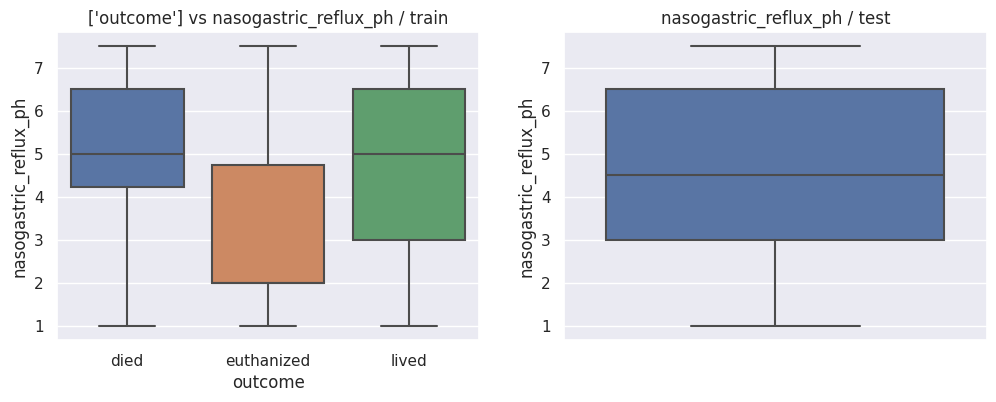

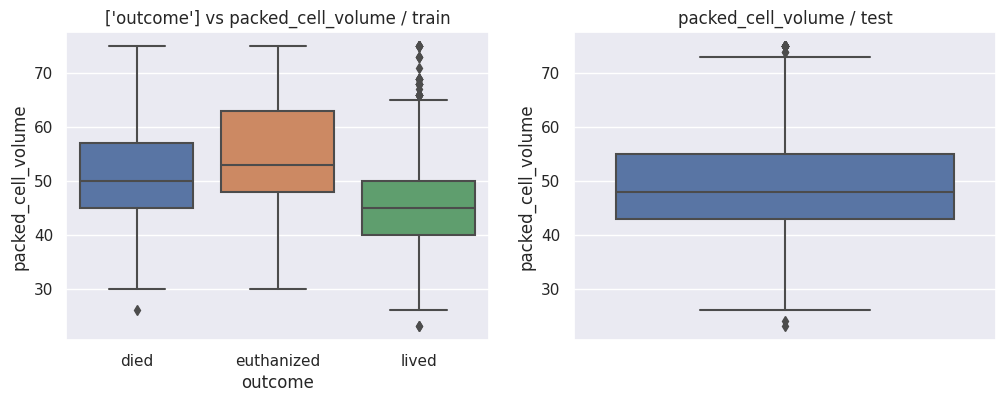

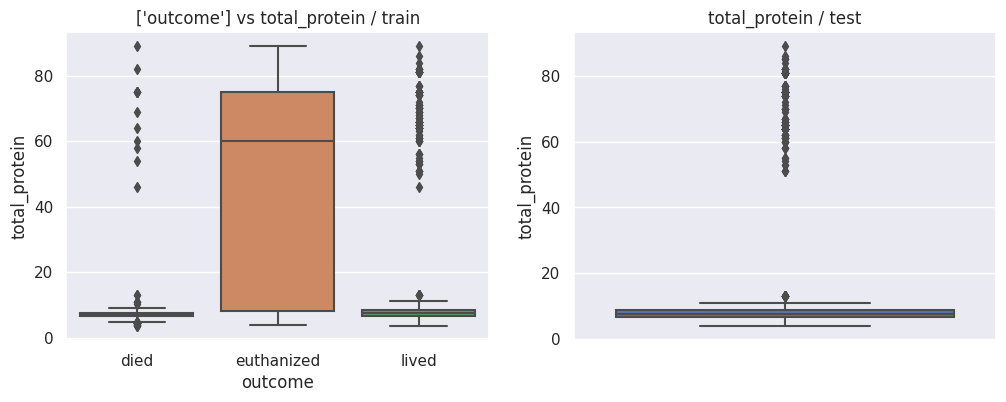

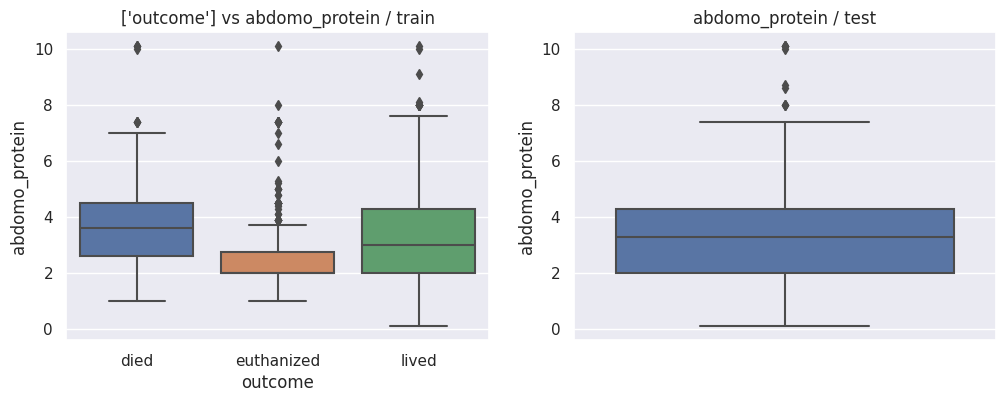

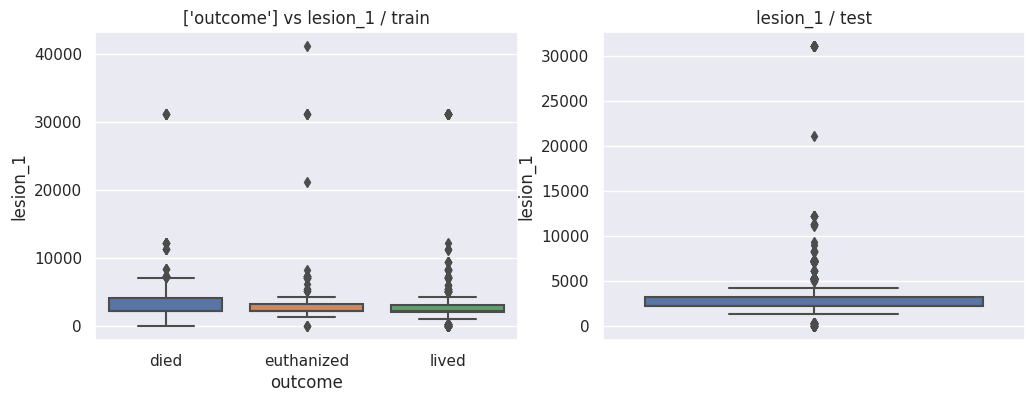

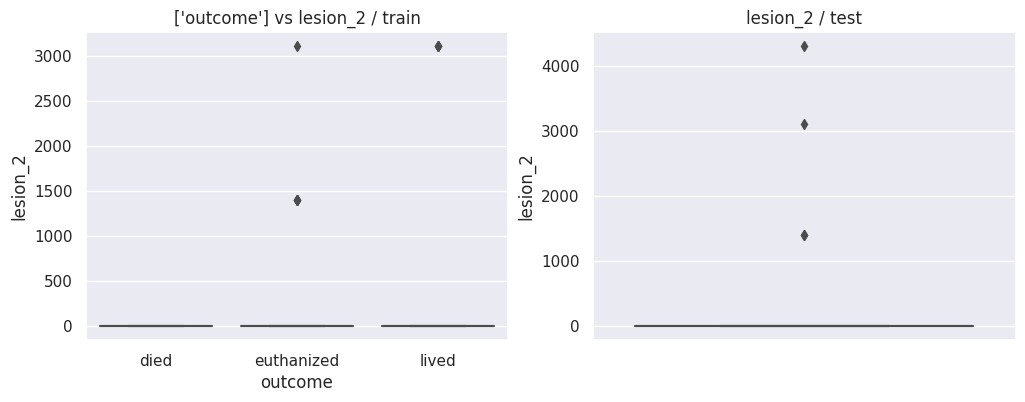

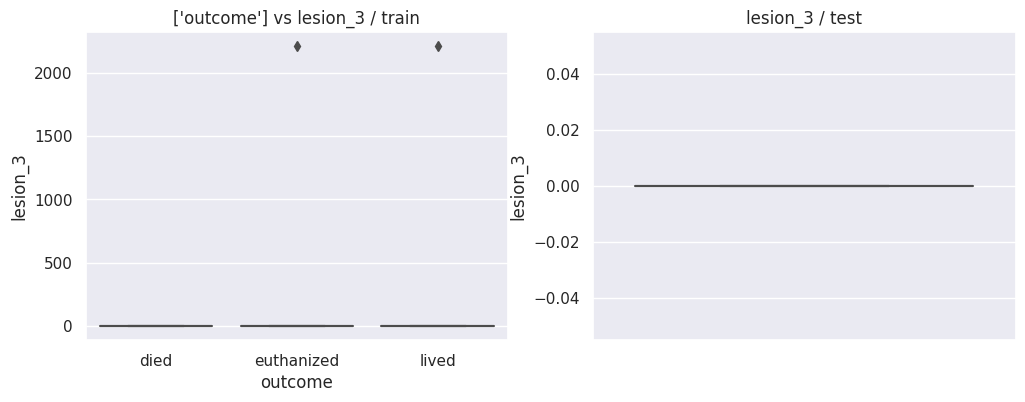

In [39]:
for feat in numerical_features:
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 2, 1)
    sns.boxplot(data=train, x=target, y=feat)
    plt.title(target_name + ' vs ' + feat + ' / train')
    x1 = plt.subplot(1, 2, 2)
    sns.boxplot(data=test, y=feat)
    plt.title(feat + ' / test')
    plt.show()

### 特徴量の重要度評価

CPU times: user 1.19 s, sys: 967 ms, total: 2.16 s
Wall time: 1.38 s


<Axes: >

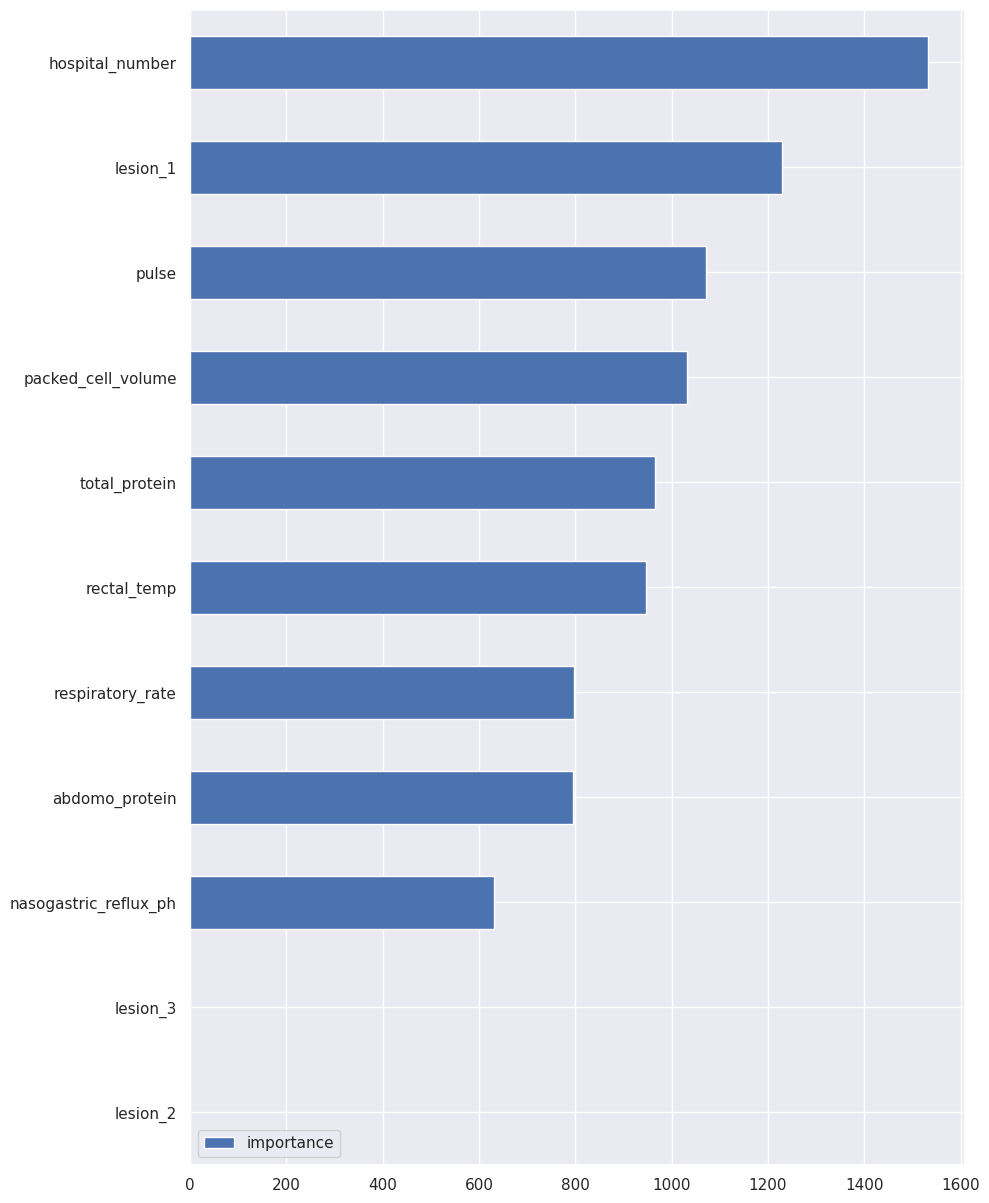

In [46]:
%%time

lgb = LGBMClassifier(
    random_state=42,
)

lgb.fit(X, y)
importance = lgb.feature_importances_

feature_importance = pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
    .sort_values(ascending=True, by='importance')

feature_importance.plot(kind='barh', figsize=(10, 15), color='b')

In [47]:
feature_importance

importance
lesion_2                        0
lesion_3                        0
nasogastric_reflux_ph         631
abdomo_protein                796
respiratory_rate              797
rectal_temp                   946
total_protein                 965
packed_cell_volume           1032
pulse                        1071
lesion_1                     1229
hospital_number              1533

考察
- lesion_2, lesion_3は重要度が確認されなかった
- 全体的に大きな差がない状態で重要度が確認された

### 相関（ヒートマップ）

<Axes: >

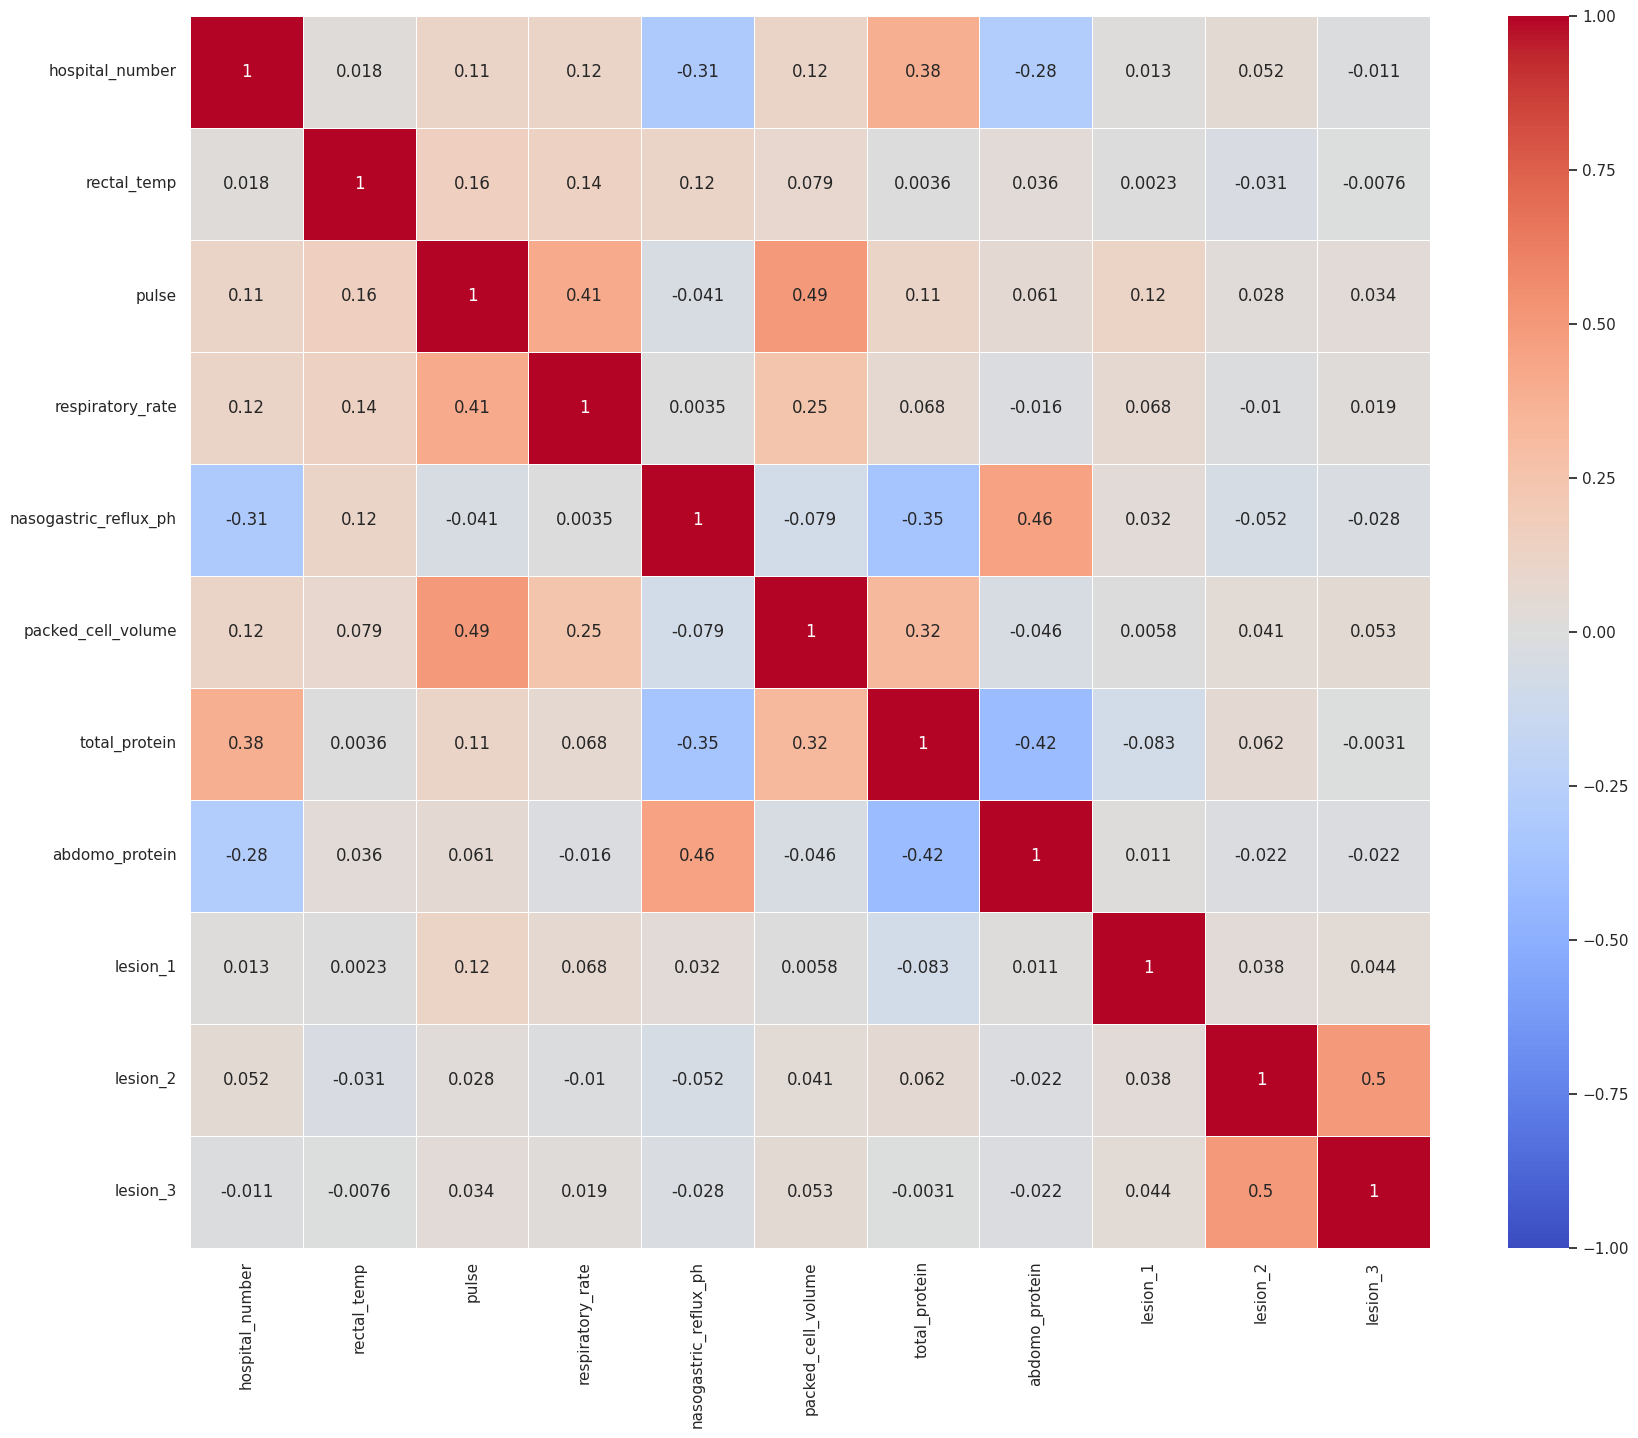

In [48]:
corr = train[numerical_features].corr(method='spearman')
plt.figure()
sns.heatmap(corr, linewidth=0.5, square=False, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

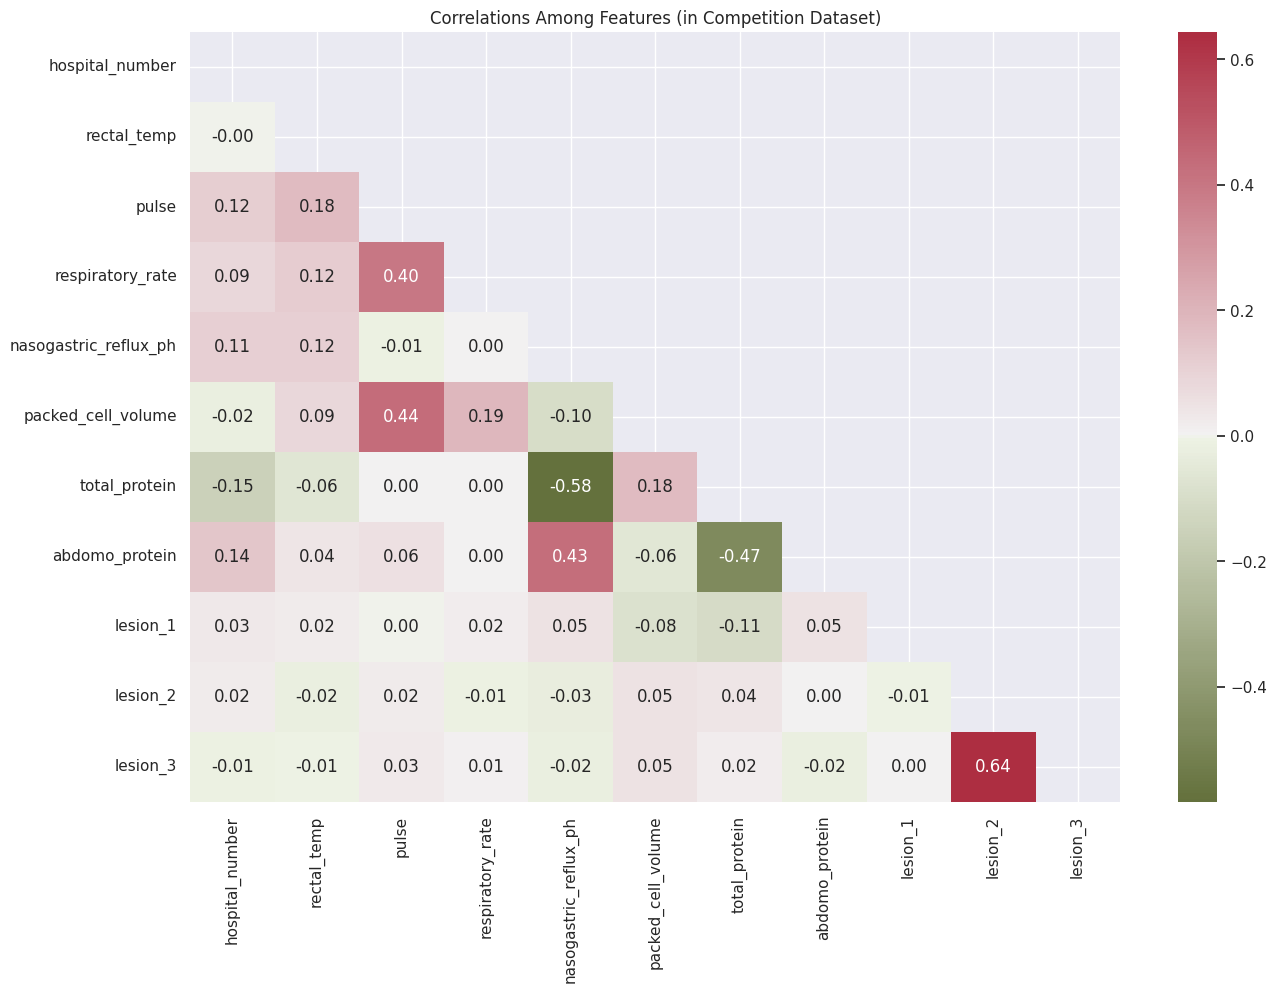

In [49]:
corr_mat_data = train[numerical_features].corr()
data_mask = np.triu(np.ones_like(corr_mat_data, dtype=bool))

cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center='light', as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat_data, annot=True, cmap=cmap, fmt='.2f', center=0,
            annot_kws={'size': 12}, mask=data_mask).set_title('Correlations Among Features (in Competition Dataset)');

#### カテゴリ変数をラベルエンコーディングして、相関をプロットする

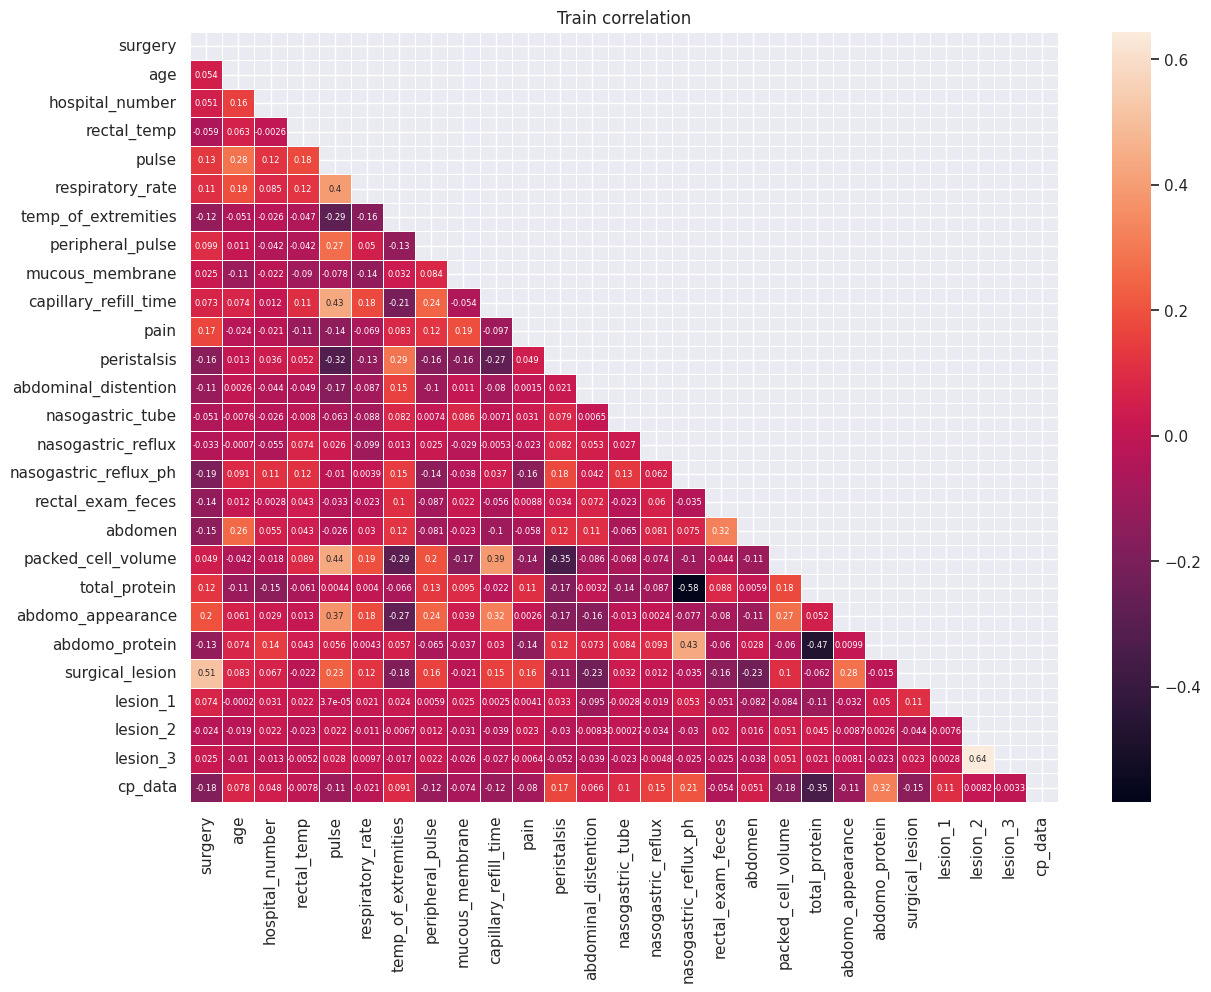

In [50]:
train_encoded = train.copy()

label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_encoded[column] = le.fit_transform(train[column])
    label_encoders[column] = le

# 目的変数がobject型（3水準以上）であるため、ラベルエンコーディングを適用する
le = LabelEncoder()
train['outcome_le'] = le.fit_transform(train['outcome'])

def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
    excluded_columns = ['id', 'outcome']
    columns_without_excluded = [col for col in df.columns if col not in excluded_columns]
    corr = df[columns_without_excluded].corr()
    
    fig, axes = plt.subplots(figsize=(14, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, annot=True, annot_kws={"size":6})
    plt.title(title_name)
    plt.show()
    
plot_correlation_heatmap(train_encoded)

In [55]:
# 目的変数と最も相関係数が高い説明変数の値ごとのデータ数を数える
corr_1_size = train.groupby('total_protein').size() # 説明変数を指定する
corr_1_size.sort_values(ascending=False).head(10)

total_protein
7.50000     135
7.00000      77
6.50000      68
6.60000      67
8.10000      64
6.00000      64
7.20000      63
75.00000     51
8.00000      35
81.00000     33
dtype: int64

### 階層的クラスタリング

- 特徴間の関係の強さと方向性を調べる
- 特徴をクラスタリングする

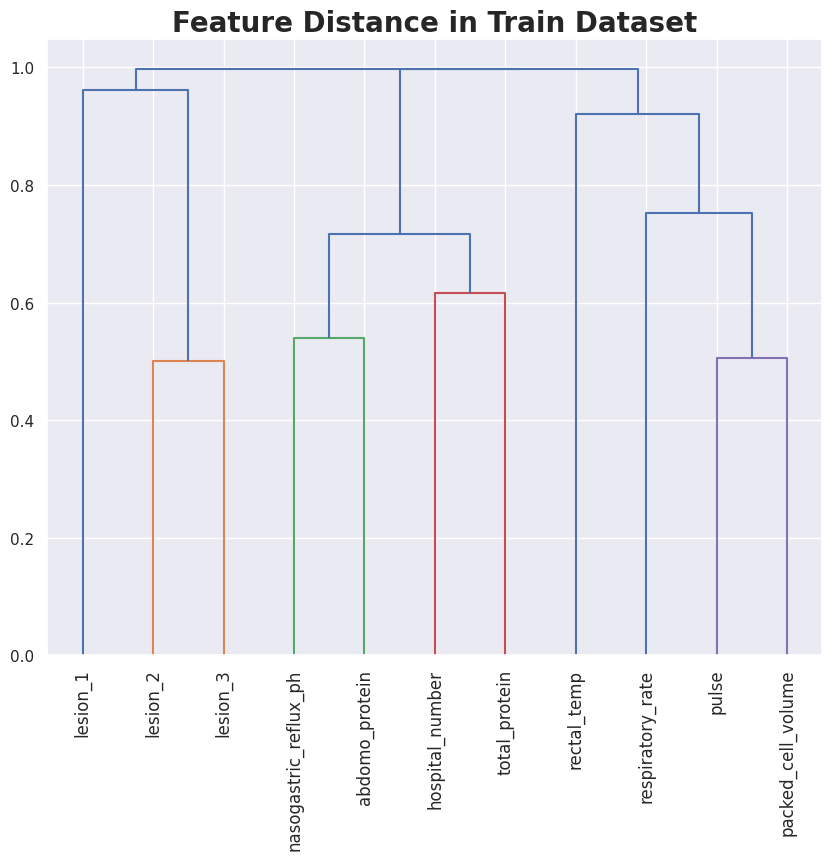

In [57]:
def distance(data, label = ''):
    corr = data.corr(method='spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')

    plt.figure(figsize=(10, 8))
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90)
    plt.title(f'Feature Distance in {label} Dataset', weight='bold', size=20)
    plt.show()

distance(train[numerical_features], 'Train')
# distance(test[numerical_features], 'Test')

- テストデータはクラスタリングできなかったため、実施しなかった

考察
- lesion_1と lesion_2, lesion_3は別物と捉えていいと考察した

## EDAの可視化するためのライブラリ

### sweetviz

In [58]:
from sweetviz import FeatureConfig

# 目的変数を数値として扱うように設定
feature_config = FeatureConfig(force_num=['outcome_le'])
report = sv.compare([train, "Train"], [test, "Test"], target_feat='outcome_le', feat_cfg=feature_config)
report.show_html(OUTPUT_DIR + "/EDA_sweetviz.html")


                                             |          | [  0%]   00:00 -> (? left)

Report /kaggle/working//EDA_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 実行時間を調べるために使う

In [59]:
end_time = time.time()
lap = end_time - start_time
indi_time = changeHMS(lap)
indi_time

'9m36s'